In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import nibabel as nib
import pickle
import skimage
from batchgenerators.augmentations.utils import pad_nd_image

from jonas_net import AlbuNet3D34

## Loading Test Data + predicted seg output

In [3]:
path_to_this_repo_folder = 'C:/Users/JiachennCJC/Documents/GitHub/brats-pretraining_jiachenn/'

def subimage(ax, data, title, alpha=1.0):
    if alpha < 1.0:
        cmap = 'hot'
    else:
        cmap = 'gray'

    ax.imshow(
        data.T, cmap=cmap,
        vmin=data.min(), vmax=data.max(),
        alpha=alpha
    )
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(title)
    ax.title.set_y(-0.3)
    ax.title.set_fontfamily('Times New Roman')
    ax.title.set_fontsize(10)

### BraTS18

In [ ]:
nib.load(test_data_path_18+)

In [64]:
model_folder = "brats18_3d_pretrained_2"

test_data_path_18 = f'{path_to_this_repo_folder}MICCAI_BraTS2018_ValidationData/'
# pre_fix_path = f'{path_to_this_repo_folder}BraTS18Validation_pre_fix_segmentation_output/{model_folder}/Brats18ValidationData/'
# post_fix_path = f'{path_to_this_repo_folder}BraTS18Validation_segmentation_output/{model_folder}/Brats18ValidationData/' 
seg_output_path = f'{path_to_this_repo_folder}segmentation_output/{model_folder}/Brats18ValidationData/'

patient_list = [i for i in os.listdir(test_data_path_18) if i != "survival_evaluation.csv"]

for patient_name in patient_list:
    print(f"Patient name: {patient_name}")
    patient_t1 = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_t1.nii.gz').get_fdata()
    patient_t1c = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_t1ce.nii.gz').get_fdata()
    patient_t2 = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_t2.nii.gz').get_fdata()
    patient_flair = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_flair.nii.gz').get_fdata()

#     pre_fix_seg = nib.load(pre_fix_path + f"{patient_name}.nii.gz").get_fdata()
#     post_fix_seg = nib.load(post_fix_path + f"{patient_name}.nii.gz").get_fdata()
    patient_seg = nib.load(seg_output_path+ f"{patient_name}.nii.gz").get_fdata()
    
    fig, axs = plt.subplots(1, 5, frameon=False)
    slice_nr = 65

    # Remove horizontal space between axes
    fig.subplots_adjust(wspace=0)

    subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

    subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

    subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

    subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

    subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[4], patient_seg[:,:,slice_nr], '(e) Segm.', alpha=0.8)

    plt.show()

Patient name: Brats18_CBICA_AAM_1


FileNotFoundError: No such file or no access: 'C:/Users/JiachennCJC/Documents/GitHub/brats-pretraining_jiachenn/segmentation_output/brats18_3d_pretrained_2/Brats18ValidationData/Brats18_CBICA_AAM_1.nii.gz'

In [ ]:
model_folder = "brats18_3d_pretrained_outputpathfix_1"
patient_name = "Brats18_CBICA_AAM_1"

test_data_path_18 = f'{path_to_this_repo_folder}MICCAI_BraTS2018_ValidationData/'
pre_fix_path = f'{path_to_this_repo_folder}BraTS18Validation_pre_fix_segmentation_output/{model_folder}/Brats18ValidationData/'
post_fix_path = f'{path_to_this_repo_folder}BraTS18Validation_segmentation_output/{model_folder}/Brats18ValidationData/' 
# seg_output_path = f'{path_to_this_repo_folder}testing_segmentation_output/{model_folder}/BraTS2018Validation_preprocessed/'

patient_t1 = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_t1.nii.gz').get_fdata()
patient_t1c = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_t1ce.nii.gz').get_fdata()
patient_t2 = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_t2.nii.gz').get_fdata()
patient_flair = nib.load(test_data_path_18+ patient_name+ f'/{patient_name}_flair.nii.gz').get_fdata()

pre_fix_seg = nib.load(pre_fix_path + f"{patient_name}.nii.gz").get_fdata()
post_fix_seg = nib.load(post_fix_path + f"{patient_name}.nii.gz").get_fdata()

fig, axs = plt.subplots(1, 5, frameon=False)
slice_nr = 65

# Remove horizontal space between axes
fig.subplots_adjust(wspace=0)

subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

# subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
subimage(axs[4], post_fix_seg[:,:,slice_nr], '(e) Segm.', alpha=0.8)

# subimage(axs[5], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
# subimage(axs[5], post_fix_seg[:,:,slice_nr], '(f) Prefix-Segm.', alpha=0.8)

# plt.tight_layout()
plt.savefig('figures/example_seg.pdf', dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()

### Brats20


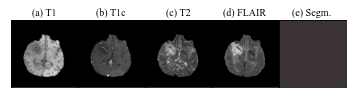

(array([ 45,  45,  46, ..., 181, 181, 181], dtype=int64),
 array([129, 129, 122, ..., 157, 157, 158], dtype=int64),
 array([ 69,  70,  58, ..., 100, 101,  94], dtype=int64))

In [9]:
model_folder = "20210309-021115_brats20_3d_pretrained_new_1_lr_0.01_epochs_60_50"
patient_number = "005"

seg_output_path = f'{path_to_this_repo_folder}segmentation_output/{model_folder}/Brats20ValidationData/'
aug_seg_output_path = f'{path_to_this_repo_folder}augmented_segmentation_output/{model_folder}/Brats20ValidationData/'
validation_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_ValidationData/'
training_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_TrainingData/'

patient_t1 = nib.load(validation_data_path + f'BraTS20_Validation_{patient_number}/' +  f'BraTS20_Validation_{patient_number}_t1.nii.gz').get_fdata()
patient_t1c = nib.load(validation_data_path + f'BraTS20_Validation_{patient_number}/' +  f'BraTS20_Validation_{patient_number}_t1ce.nii.gz').get_fdata()
patient_t2 = nib.load(validation_data_path + f'BraTS20_Validation_{patient_number}/' +  f'BraTS20_Validation_{patient_number}_t2.nii.gz').get_fdata()
patient_flair = nib.load(validation_data_path + f'BraTS20_Validation_{patient_number}/' +  f'BraTS20_Validation_{patient_number}_flair.nii.gz').get_fdata()
patient_seg = nib.load(seg_output_path+ f"BraTS20_Validation_{patient_number}.nii.gz").get_fdata()
patient_list = [i for i in os.listdir(validation_data_path) if i != "survival_evaluation.csv"]

slice_nr = 65

fig, axs = plt.subplots(1, 5, frameon=False)

# Remove horizontal space between axes
fig.subplots_adjust(wspace=0)

subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

# subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
subimage(axs[4], patient_seg[:,:,slice_nr], '(e) Segm.', alpha=0.8)

# plt.tight_layout()
plt.savefig(f'figures/Patient_{patient_number}.png', dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()
patient_seg.nonzero()

Patient name: BraTS20_Validation_001


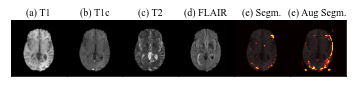

Patient name: BraTS20_Validation_002


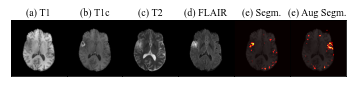

Patient name: BraTS20_Validation_003


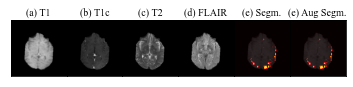

Patient name: BraTS20_Validation_004


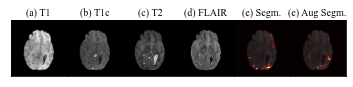

Patient name: BraTS20_Validation_005


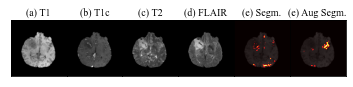

Patient name: BraTS20_Validation_006


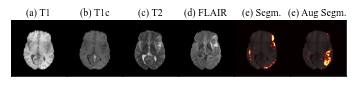

Patient name: BraTS20_Validation_007


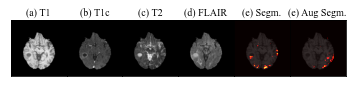

Patient name: BraTS20_Validation_008


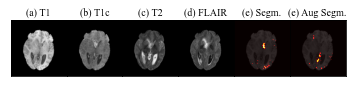

Patient name: BraTS20_Validation_009


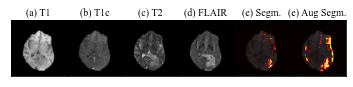

Patient name: BraTS20_Validation_010


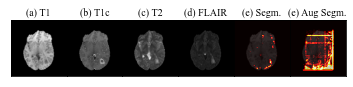

Patient name: BraTS20_Validation_011


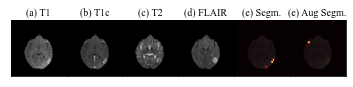

Patient name: BraTS20_Validation_012


KeyboardInterrupt: 

In [22]:
model_folder = "20210318-153108_brats20_3d_pretrained_trainbatchsize_75_lr_0.0001_epochs_50_epochbatch_75_epoch_40"

seg_output_path = f'{path_to_this_repo_folder}segmentation_output/{model_folder}/Brats20ValidationData/'
aug_seg_output_path = f'{path_to_this_repo_folder}augmented_segmentation_output/{model_folder}/Brats20ValidationData/'
validation_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_ValidationData/'
training_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_TrainingData/'

patient_list = [i for i in os.listdir(validation_data_path) if i != "survival_evaluation.csv"]

for patient_name in patient_list:
    print(f"Patient name: {patient_name}")
    patient_t1 = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_t1.nii.gz').get_fdata()
    patient_t1c = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_t1ce.nii.gz').get_fdata()
    patient_t2 = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_t2.nii.gz').get_fdata()
    patient_flair = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_flair.nii.gz').get_fdata()
    patient_seg = nib.load(seg_output_path+ f"{patient_name}.nii.gz").get_fdata()
    patient_aug_seg = nib.load(aug_seg_output_path+ f"{patient_name}.nii.gz").get_fdata()

    
    fig, axs = plt.subplots(1, 6, frameon=False)
    slice_nr = 65
#     print(patient_seg.nonzero())
    # Remove horizontal space between axes
    fig.subplots_adjust(wspace=0)

    subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

    subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

    subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

    subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

    subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[4], patient_seg[:,:,slice_nr], '(e) Segm.', alpha=0.8)
    
    subimage(axs[5], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[5], patient_aug_seg[:,:,slice_nr], '(e) Aug Segm.', alpha=0.8)
    
#     plt.savefig(f'figures/aug_seg/{patient_name}.jpg', dpi=400, bbox_inches='tight', pad_inches=0)


    plt.show()

In [1]:
model_folder = "20210321-095418_brats20_3d_pretrained_trainbatchsize_100_2_lr_0.0001_epochs_50_epochbatch_100_epoch_UPDATEDVALIDATION_30"

seg_output_path = f'{path_to_this_repo_folder}segmentation_output/{model_folder}/Brats20ValidationData/'
validation_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_ValidationData/'
training_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_TrainingData/'

patient_list = [i for i in os.listdir(validation_data_path) if i != "survival_evaluation.csv"]

for patient_name in patient_list:
    print(f"Patient name: {patient_name}")
    patient_t1 = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_t1.nii.gz').get_fdata()
    patient_t1c = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_t1ce.nii.gz').get_fdata()
    patient_t2 = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_t2.nii.gz').get_fdata()
    patient_flair = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_flair.nii.gz').get_fdata()
    patient_seg = nib.load(seg_output_path+ f"{patient_name}.nii.gz").get_fdata()
    
    fig, axs = plt.subplots(1, 5, frameon=False)
    slice_nr = 65
#     print(patient_seg.nonzero())
    # Remove horizontal space between axes
    fig.subplots_adjust(wspace=0)

    subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

    subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

    subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

    subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

    subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[4], patient_seg[:,:,slice_nr], '(e) Segm.', alpha=0.8)
    
    plt.savefig(f'figures/{patient_name}.jpg', dpi=400, bbox_inches='tight', pad_inches=0)


    plt.show()

NameError: name 'path_to_this_repo_folder' is not defined

Patient name: BraTS20_Validation_001


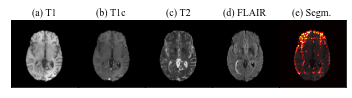

Patient name: BraTS20_Validation_002


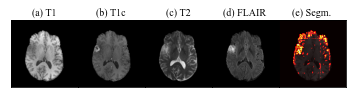

Patient name: BraTS20_Validation_003


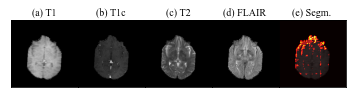

Patient name: BraTS20_Validation_004


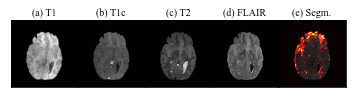

Patient name: BraTS20_Validation_005


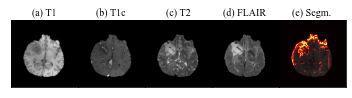

Patient name: BraTS20_Validation_006


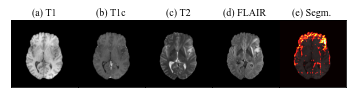

Patient name: BraTS20_Validation_007


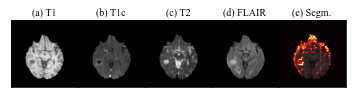

Patient name: BraTS20_Validation_008


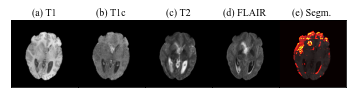

Patient name: BraTS20_Validation_009


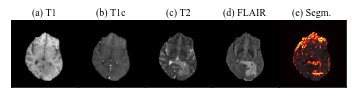

Patient name: BraTS20_Validation_010


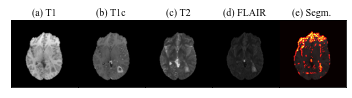

Patient name: BraTS20_Validation_011


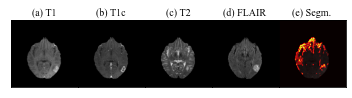

Patient name: BraTS20_Validation_012


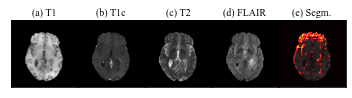

Patient name: BraTS20_Validation_013


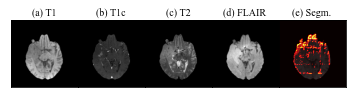

Patient name: BraTS20_Validation_014


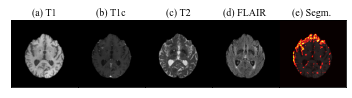

Patient name: BraTS20_Validation_015


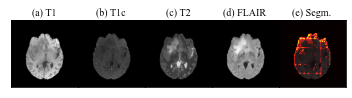

Patient name: BraTS20_Validation_016


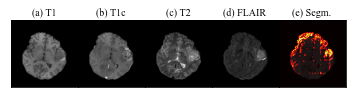

Patient name: BraTS20_Validation_017


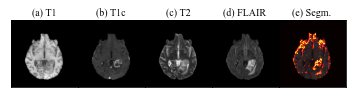

Patient name: BraTS20_Validation_018


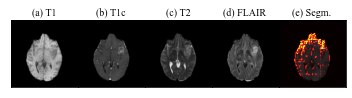

Patient name: BraTS20_Validation_019


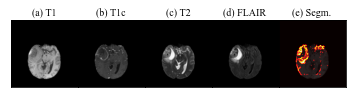

Patient name: BraTS20_Validation_020


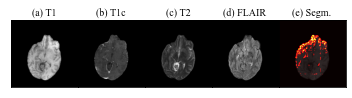

Patient name: BraTS20_Validation_021


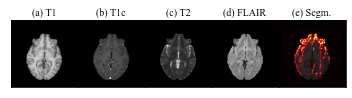

Patient name: BraTS20_Validation_022


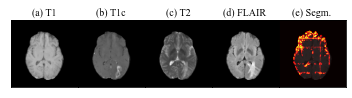

Patient name: BraTS20_Validation_023


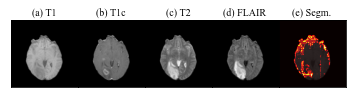

Patient name: BraTS20_Validation_024


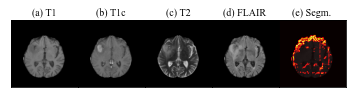

Patient name: BraTS20_Validation_025


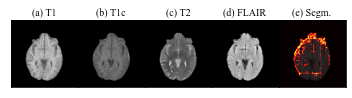

Patient name: BraTS20_Validation_026


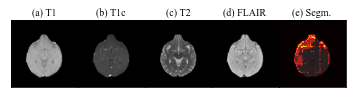

Patient name: BraTS20_Validation_027


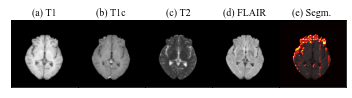

Patient name: BraTS20_Validation_028


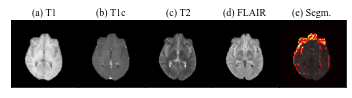

Patient name: BraTS20_Validation_029


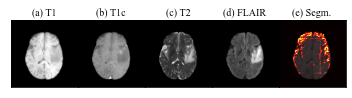

Patient name: BraTS20_Validation_030


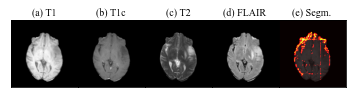

Patient name: BraTS20_Validation_031


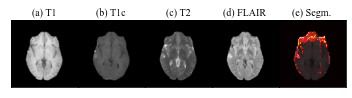

Patient name: BraTS20_Validation_032


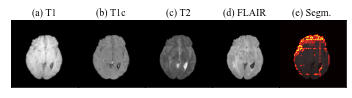

Patient name: BraTS20_Validation_033


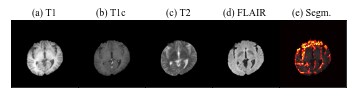

Patient name: BraTS20_Validation_034


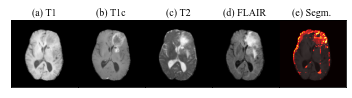

Patient name: BraTS20_Validation_035


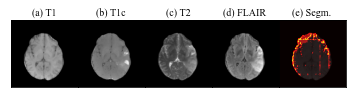

Patient name: BraTS20_Validation_036


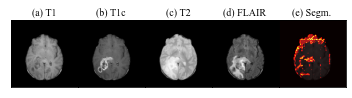

Patient name: BraTS20_Validation_037


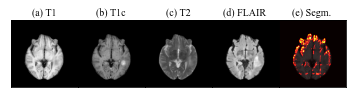

Patient name: BraTS20_Validation_038


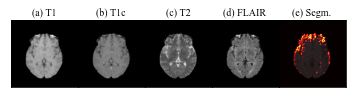

Patient name: BraTS20_Validation_039


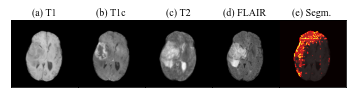

Patient name: BraTS20_Validation_040


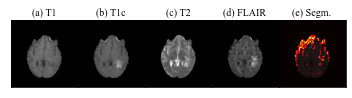

Patient name: BraTS20_Validation_041


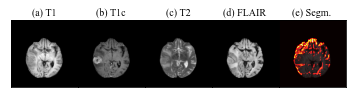

Patient name: BraTS20_Validation_042


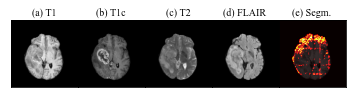

Patient name: BraTS20_Validation_043


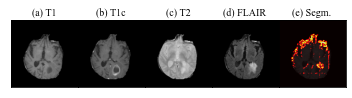

Patient name: BraTS20_Validation_044


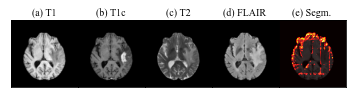

Patient name: BraTS20_Validation_045


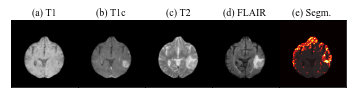

Patient name: BraTS20_Validation_046


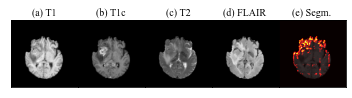

Patient name: BraTS20_Validation_047


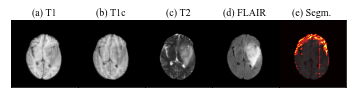

Patient name: BraTS20_Validation_048


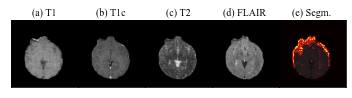

Patient name: BraTS20_Validation_049


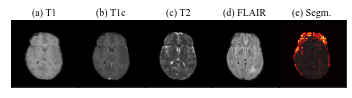

Patient name: BraTS20_Validation_050


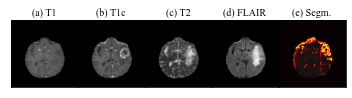

Patient name: BraTS20_Validation_051


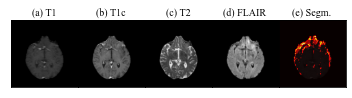

Patient name: BraTS20_Validation_052


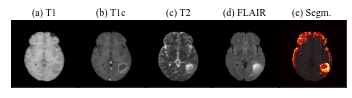

Patient name: BraTS20_Validation_053


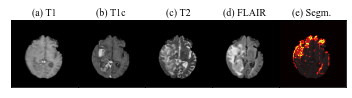

Patient name: BraTS20_Validation_054


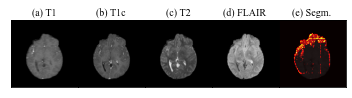

Patient name: BraTS20_Validation_055


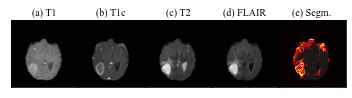

Patient name: BraTS20_Validation_056


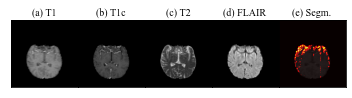

Patient name: BraTS20_Validation_057


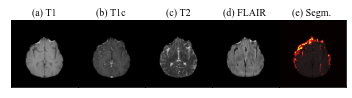

Patient name: BraTS20_Validation_058


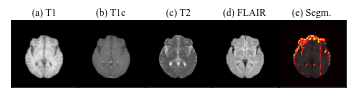

Patient name: BraTS20_Validation_059


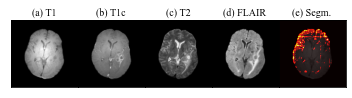

Patient name: BraTS20_Validation_060


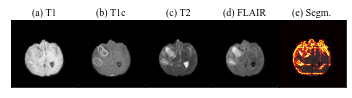

Patient name: BraTS20_Validation_061


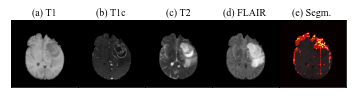

Patient name: BraTS20_Validation_062


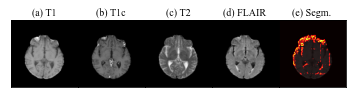

Patient name: BraTS20_Validation_063


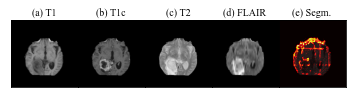

Patient name: BraTS20_Validation_064


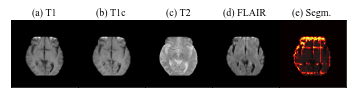

Patient name: BraTS20_Validation_065


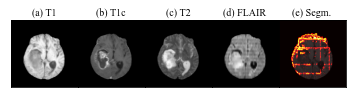

Patient name: BraTS20_Validation_066


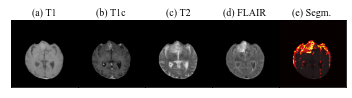

Patient name: BraTS20_Validation_067


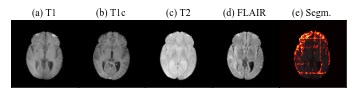

Patient name: BraTS20_Validation_068


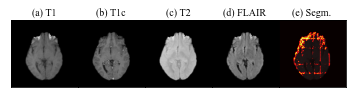

Patient name: BraTS20_Validation_069


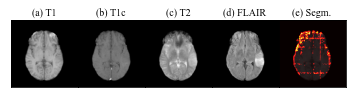

Patient name: BraTS20_Validation_070


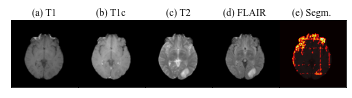

Patient name: BraTS20_Validation_071


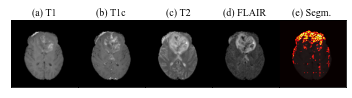

Patient name: BraTS20_Validation_072


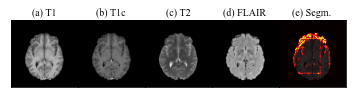

Patient name: BraTS20_Validation_073


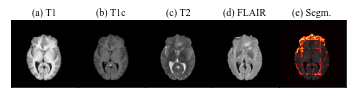

Patient name: BraTS20_Validation_074


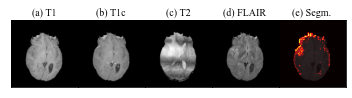

Patient name: BraTS20_Validation_075


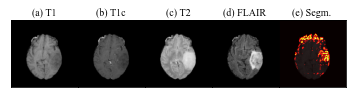

Patient name: BraTS20_Validation_076


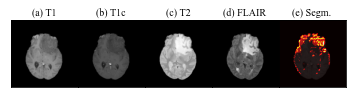

Patient name: BraTS20_Validation_077


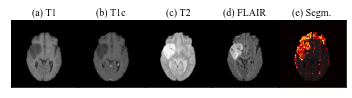

Patient name: BraTS20_Validation_078


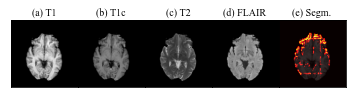

Patient name: BraTS20_Validation_079


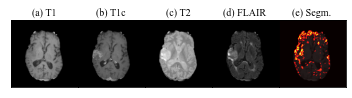

Patient name: BraTS20_Validation_080


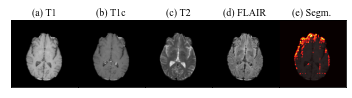

Patient name: BraTS20_Validation_081


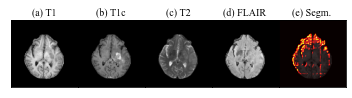

Patient name: BraTS20_Validation_082


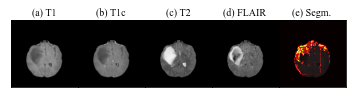

Patient name: BraTS20_Validation_083


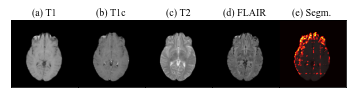

Patient name: BraTS20_Validation_084


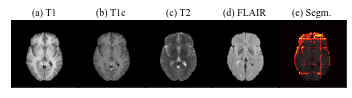

Patient name: BraTS20_Validation_085


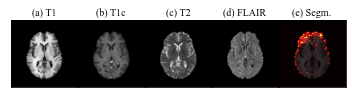

Patient name: BraTS20_Validation_086


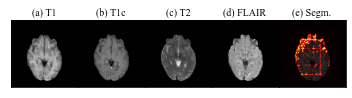

Patient name: BraTS20_Validation_087


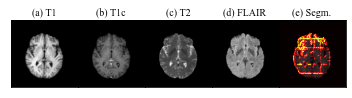

Patient name: BraTS20_Validation_088


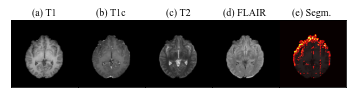

Patient name: BraTS20_Validation_089


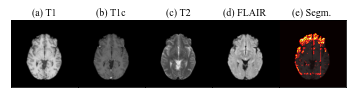

Patient name: BraTS20_Validation_090


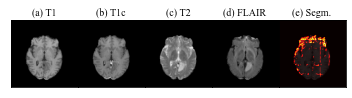

Patient name: BraTS20_Validation_091


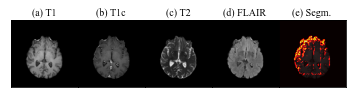

Patient name: BraTS20_Validation_092


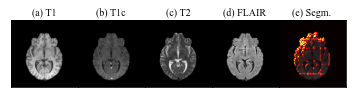

Patient name: BraTS20_Validation_093


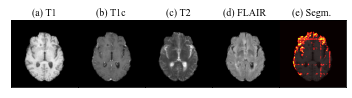

Patient name: BraTS20_Validation_094


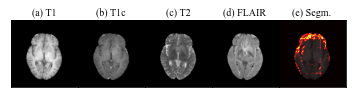

Patient name: BraTS20_Validation_095


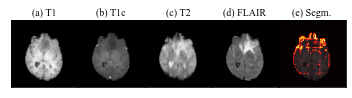

Patient name: BraTS20_Validation_096


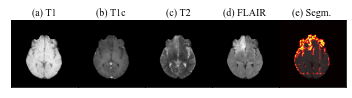

Patient name: BraTS20_Validation_097


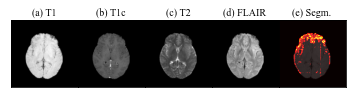

Patient name: BraTS20_Validation_098


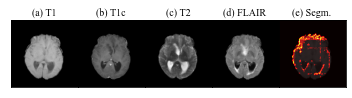

Patient name: BraTS20_Validation_099


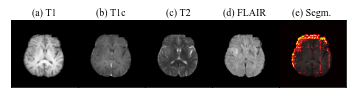

Patient name: BraTS20_Validation_100


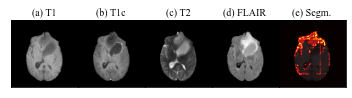

Patient name: BraTS20_Validation_101


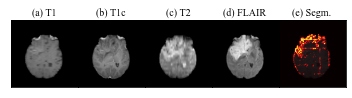

Patient name: BraTS20_Validation_102


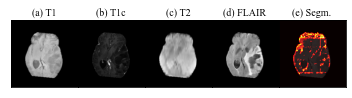

Patient name: BraTS20_Validation_103


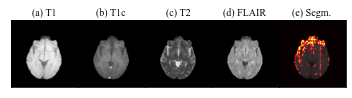

Patient name: BraTS20_Validation_104


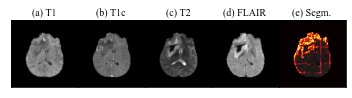

Patient name: BraTS20_Validation_105


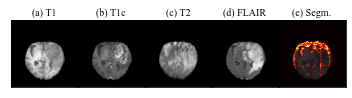

Patient name: BraTS20_Validation_106


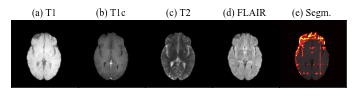

Patient name: BraTS20_Validation_107


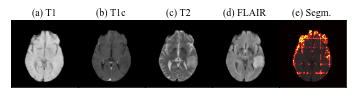

Patient name: BraTS20_Validation_108


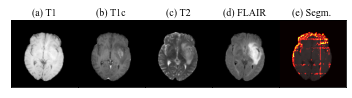

Patient name: BraTS20_Validation_109


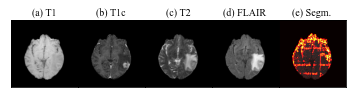

Patient name: BraTS20_Validation_110


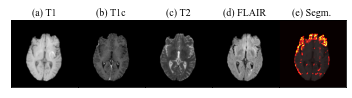

Patient name: BraTS20_Validation_111


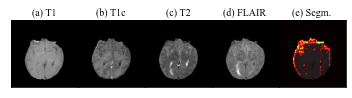

Patient name: BraTS20_Validation_112


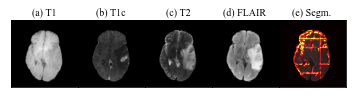

Patient name: BraTS20_Validation_113


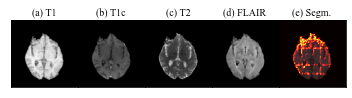

Patient name: BraTS20_Validation_114


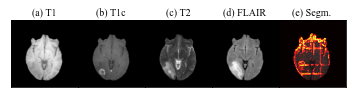

Patient name: BraTS20_Validation_115


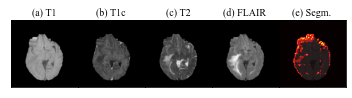

Patient name: BraTS20_Validation_116


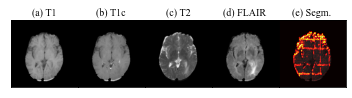

Patient name: BraTS20_Validation_117


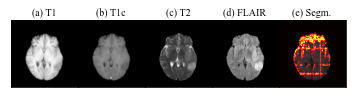

Patient name: BraTS20_Validation_118


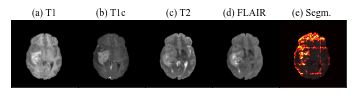

Patient name: BraTS20_Validation_119


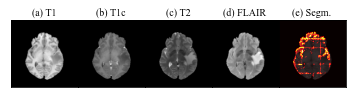

Patient name: BraTS20_Validation_120


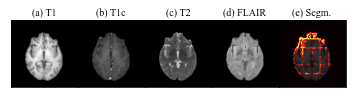

Patient name: BraTS20_Validation_121


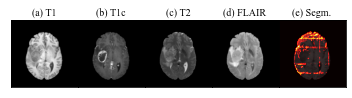

Patient name: BraTS20_Validation_122


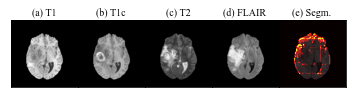

Patient name: BraTS20_Validation_123


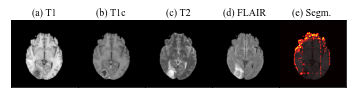

Patient name: BraTS20_Validation_124


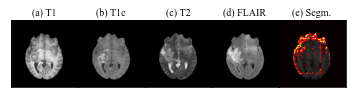

Patient name: BraTS20_Validation_125


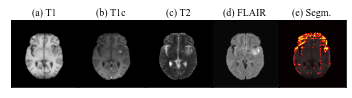

Patient name: name_mapping_validation_data.csv


FileNotFoundError: No such file or no access: 'C:/Users/JiachennCJC/Documents/GitHub/brats-pretraining_jiachenn/MICCAI_BraTS2020_ValidationData/name_mapping_validation_data.csv/name_mapping_validation_data.csv_t1.nii.gz'

In [6]:
model_folder = "20210311-070028_brats20_3d_pretrained_trainbatchsize_200_lr_0.001_epochs_50_epochbatch_200_epoch_30"

seg_output_path = f'{path_to_this_repo_folder}segmentation_output/Wrong Preprocessing Seg Output/{model_folder}/Brats20ValidationData/'
# aug_seg_output_path = f'{path_to_this_repo_folder}augmented_segmentation_output/{model_folder}/Brats20ValidationData/'
validation_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_ValidationData/'
training_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_TrainingData/'

patient_list = [i for i in os.listdir(validation_data_path) if i != "survival_evaluation.csv"]

for patient_name in patient_list:
    print(f"Patient name: {patient_name}")
    patient_t1 = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_t1.nii.gz').get_fdata()
    patient_t1c = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_t1ce.nii.gz').get_fdata()
    patient_t2 = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_t2.nii.gz').get_fdata()
    patient_flair = nib.load(validation_data_path + f'{patient_name}/' +  f'{patient_name}_flair.nii.gz').get_fdata()
    patient_seg = nib.load(seg_output_path+ f"{patient_name}.nii.gz").get_fdata()
#     patient_aug_seg = nib.load(aug_seg_output_path+ f"{patient_name}.nii.gz").get_fdata()

    
    fig, axs = plt.subplots(1, 5, frameon=False)
    slice_nr = 65
#     print(patient_seg.nonzero())
    # Remove horizontal space between axes
    fig.subplots_adjust(wspace=0)

    subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

    subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

    subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

    subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

    subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[4], patient_seg[:,:,slice_nr], '(e) Segm.', alpha=0.8)
    
#     subimage(axs[5], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
#     subimage(axs[5], patient_aug_seg[:,:,slice_nr], '(e) Aug Segm.', alpha=0.8)
    
#     plt.savefig(f'figures/aug_seg/{patient_name}.jpg', dpi=400, bbox_inches='tight', pad_inches=0)


    plt.show()

### Overlaying training data with its segmentation labels

Patient name: BraTS20_Training_001
(array([ 51,  51,  51, ..., 143, 143, 143], dtype=int64), array([140, 140, 140, ..., 174, 175, 175], dtype=int64), array([62, 63, 64, ..., 84, 83, 84], dtype=int64))


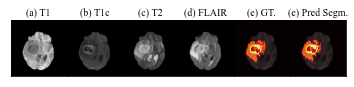

Patient name: BraTS20_Training_002
(array([ 55,  55,  56, ..., 115, 115, 115], dtype=int64), array([122, 123, 110, ..., 113, 114, 114], dtype=int64), array([72, 72, 68, ..., 47, 45, 46], dtype=int64))


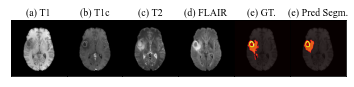

Patient name: BraTS20_Training_003
(array([125, 125, 125, ..., 180, 180, 180], dtype=int64), array([147, 147, 148, ..., 154, 155, 156], dtype=int64), array([92, 93, 92, ..., 66, 66, 66], dtype=int64))


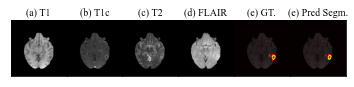

Patient name: BraTS20_Training_004
(array([125, 125, 126, ..., 180, 180, 180], dtype=int64), array([140, 141, 140, ..., 159, 159, 160], dtype=int64), array([77, 77, 77, ..., 70, 71, 72], dtype=int64))


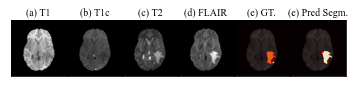

Patient name: BraTS20_Training_005
(array([117, 117, 118, ..., 175, 175, 175], dtype=int64), array([186, 187, 183, ..., 171, 171, 172], dtype=int64), array([105, 105, 105, ...,  90,  91,  94], dtype=int64))


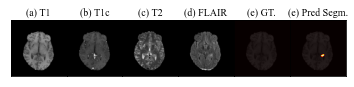

Patient name: BraTS20_Training_006
(array([104, 105, 105, ..., 176, 176, 176], dtype=int64), array([ 82,  83,  84, ..., 117, 117, 117], dtype=int64), array([84, 84, 84, ..., 93, 94, 95], dtype=int64))


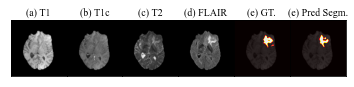

Patient name: BraTS20_Training_007
(array([140, 140, 140, ..., 185, 185, 187], dtype=int64), array([153, 153, 154, ..., 137, 137, 138], dtype=int64), array([67, 68, 66, ..., 58, 59, 57], dtype=int64))


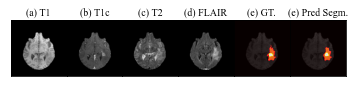

Patient name: BraTS20_Training_008
(array([ 55,  55,  55, ..., 106, 106, 106], dtype=int64), array([128, 129, 130, ..., 115, 115, 115], dtype=int64), array([42, 42, 42, ..., 53, 54, 55], dtype=int64))


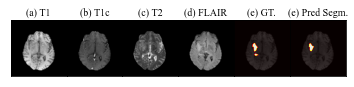

Patient name: BraTS20_Training_009


KeyboardInterrupt: 

In [18]:
model_folder = "20210309-133958_brats20_3d_pretrained_new_lr_1_lr_0.0001_epochs_60_TESTINGONTRAINING_60"

# seg_output_path = f'{path_to_this_repo_folder}segmentation_output/{model_folder}/Brats20ValidationData/'
seg_output_path = f'{path_to_this_repo_folder}segmentation_output/{model_folder}/Brats20TrainingData/'
validation_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_ValidationData/'
training_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_TrainingData/'

patient_list = [i for i in os.listdir(training_data_path) if i != "survival_evaluation.csv"]

for patient_name in patient_list:
    print(f"Patient name: {patient_name}")
    patient_t1 = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_t1.nii.gz').get_fdata()
    patient_t1c = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_t1ce.nii.gz').get_fdata()
    patient_t2 = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_t2.nii.gz').get_fdata()
    patient_flair = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_flair.nii.gz').get_fdata()
    patient_seg = nib.load(training_data_path+ f'{patient_name}/' + f"{patient_name}_seg.nii.gz").get_fdata()
    predicted_seg = nib.load(seg_output_path+ f"{patient_name}.nii.gz").get_fdata()

    fig, axs = plt.subplots(1, 6, frameon=False)
    slice_nr = 65
    print(patient_seg.nonzero())
    # Remove horizontal space between axes
    fig.subplots_adjust(wspace=0)

    subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

    subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

    subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

    subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

    subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[4], patient_seg[:,:,slice_nr], '(e) GT.', alpha=0.8)
    
    subimage(axs[5], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[5], predicted_seg[:,:,slice_nr], '(e) Pred Segm.', alpha=0.8)

    plt.savefig(f'figures/LMAO{patient_name}.jpg', dpi=400, bbox_inches='tight', pad_inches=0)

    plt.show()


### Checking preprocessing

Patient name: BraTS20_Training_301
(array([ 96,  96,  96, ..., 168, 168, 168], dtype=int64), array([95, 95, 96, ..., 93, 93, 93], dtype=int64), array([97, 98, 96, ..., 90, 91, 92], dtype=int64))


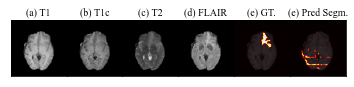

Patient name: BraTS20_Training_302
(array([ 50,  50,  50, ..., 102, 103, 106], dtype=int64), array([124, 125, 126, ..., 116, 114, 122], dtype=int64), array([55, 55, 55, ..., 59, 58, 63], dtype=int64))


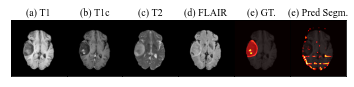

Patient name: BraTS20_Training_303
(array([116, 116, 116, ..., 156, 156, 156], dtype=int64), array([ 95,  96,  97, ...,  65,  66, 103], dtype=int64), array([122, 122, 122, ...,  86,  86, 110], dtype=int64))


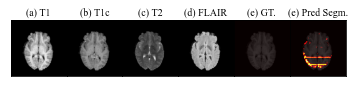

Patient name: BraTS20_Training_304
(array([ 74,  74,  74, ..., 114, 114, 114], dtype=int64), array([105, 110, 111, ..., 119, 119, 119], dtype=int64), array([48, 52, 52, ..., 53, 54, 55], dtype=int64))


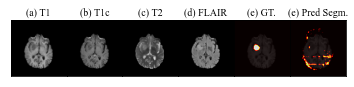

Patient name: BraTS20_Training_305
(array([ 73,  73,  73, ..., 145, 146, 147], dtype=int64), array([91, 91, 91, ..., 99, 91, 92], dtype=int64), array([92, 93, 94, ..., 97, 97, 95], dtype=int64))


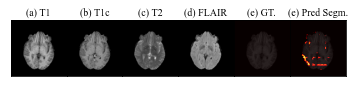

Patient name: BraTS20_Training_306
(array([ 97,  97,  98, ..., 176, 176, 176], dtype=int64), array([120, 120, 118, ..., 108, 109, 110], dtype=int64), array([93, 94, 93, ..., 96, 96, 96], dtype=int64))


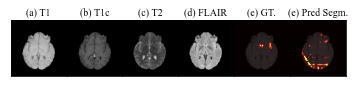

Patient name: BraTS20_Training_307
(array([ 62,  63,  63, ..., 132, 132, 132], dtype=int64), array([121, 117, 118, ..., 101, 101, 106], dtype=int64), array([63, 56, 56, ..., 69, 70, 68], dtype=int64))


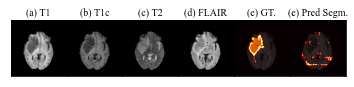

Patient name: BraTS20_Training_308
(array([ 54,  55,  55, ..., 145, 145, 145], dtype=int64), array([123, 121, 121, ...,  93,  93,  94], dtype=int64), array([83, 79, 80, ..., 91, 92, 92], dtype=int64))


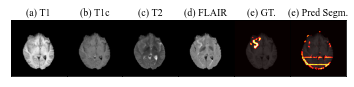

Patient name: BraTS20_Training_309
(array([108, 108, 109, ..., 182, 182, 182], dtype=int64), array([112, 112, 100, ..., 138, 139, 139], dtype=int64), array([60, 61, 64, ..., 62, 61, 62], dtype=int64))


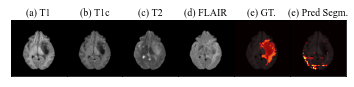

Patient name: BraTS20_Training_310
(array([ 64,  64,  65, ..., 143, 143, 143], dtype=int64), array([108, 109, 103, ...,  87,  87,  88], dtype=int64), array([71, 72, 70, ..., 73, 74, 74], dtype=int64))


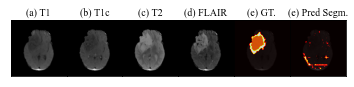

Patient name: BraTS20_Training_311
(array([127, 127, 127, ..., 173, 173, 173], dtype=int64), array([123, 123, 123, ..., 132, 132, 134], dtype=int64), array([117, 118, 119, ..., 105, 106, 106], dtype=int64))


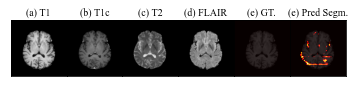

Patient name: BraTS20_Training_312
(array([ 88,  88,  89, ..., 157, 157, 157], dtype=int64), array([ 98,  99,  89, ..., 101, 102, 102], dtype=int64), array([95, 95, 94, ..., 90, 88, 89], dtype=int64))


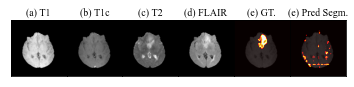

Patient name: BraTS20_Training_313
(array([ 70,  70,  71, ..., 141, 141, 141], dtype=int64), array([114, 121, 109, ..., 116, 117, 118], dtype=int64), array([ 99, 104,  99, ...,  93,  93,  92], dtype=int64))


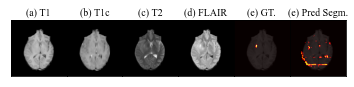

Patient name: BraTS20_Training_314
(array([124, 124, 126, ..., 175, 175, 175], dtype=int64), array([186, 187, 184, ..., 172, 173, 174], dtype=int64), array([100, 100,  91, ...,  87,  85,  86], dtype=int64))


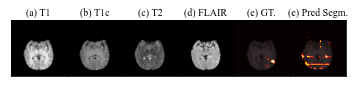

Patient name: BraTS20_Training_315
(array([136, 136, 136, ..., 174, 174, 174], dtype=int64), array([128, 128, 128, ..., 123, 124, 125], dtype=int64), array([105, 106, 107, ..., 100,  99,  99], dtype=int64))


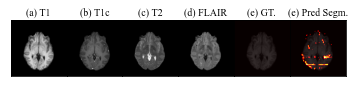

Patient name: BraTS20_Training_316
(array([ 62,  62,  62, ..., 159, 159, 159], dtype=int64), array([111, 112, 113, ..., 106, 107, 108], dtype=int64), array([71, 71, 71, ..., 78, 79, 80], dtype=int64))


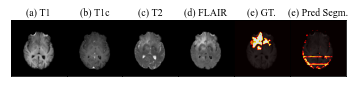

Patient name: BraTS20_Training_317
(array([152, 152, 152, ..., 186, 187, 187], dtype=int64), array([160, 161, 162, ..., 157, 151, 152], dtype=int64), array([85, 85, 85, ..., 68, 70, 70], dtype=int64))


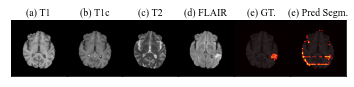

Patient name: BraTS20_Training_318
(array([ 57,  57,  57, ..., 146, 146, 146], dtype=int64), array([105, 106, 106, ...,  94,  99, 100], dtype=int64), array([82, 82, 86, ..., 83, 88, 88], dtype=int64))


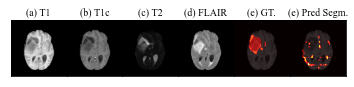

Patient name: BraTS20_Training_319
(array([ 53,  53,  53, ..., 112, 112, 112], dtype=int64), array([127, 128, 129, ..., 115, 116, 116], dtype=int64), array([66, 66, 66, ..., 68, 67, 68], dtype=int64))


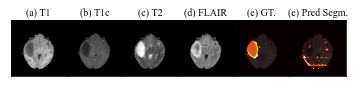

Patient name: BraTS20_Training_320
(array([ 58,  58,  58, ..., 116, 116, 116], dtype=int64), array([109, 109, 109, ..., 103, 104, 105], dtype=int64), array([78, 79, 80, ..., 66, 66, 65], dtype=int64))


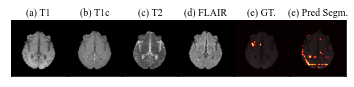

Patient name: BraTS20_Training_321
(array([ 77, 113, 115, ..., 153, 153, 170], dtype=int64), array([138,  96, 111, ..., 140, 142, 147], dtype=int64), array([121, 104, 104, ..., 119, 128,  97], dtype=int64))


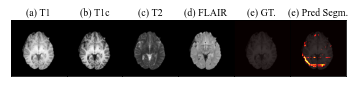

Patient name: BraTS20_Training_322
(array([122, 123, 123, ..., 183, 183, 183], dtype=int64), array([103, 102, 102, ..., 117, 117, 122], dtype=int64), array([57, 57, 58, ..., 54, 55, 47], dtype=int64))


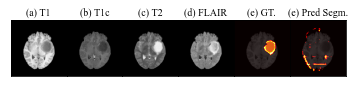

Patient name: BraTS20_Training_323
(array([ 49,  49,  49, ..., 131, 131, 131], dtype=int64), array([122, 123, 123, ..., 148, 149, 150], dtype=int64), array([56, 56, 58, ..., 78, 76, 76], dtype=int64))


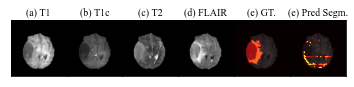

Patient name: BraTS20_Training_324
(array([ 66,  66,  66, ..., 120, 120, 121], dtype=int64), array([ 82,  83,  84, ..., 100, 100,  97], dtype=int64), array([73, 73, 73, ..., 53, 54, 53], dtype=int64))


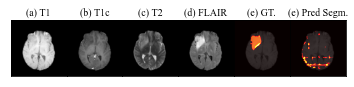

Patient name: BraTS20_Training_325
(array([ 98,  98,  98, ..., 131, 131, 132], dtype=int64), array([154, 155, 155, ..., 164, 165, 163], dtype=int64), array([34, 32, 33, ..., 43, 43, 43], dtype=int64))


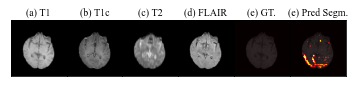

Patient name: BraTS20_Training_326
(array([111, 111, 111, ..., 168, 168, 168], dtype=int64), array([150, 151, 151, ..., 160, 161, 162], dtype=int64), array([ 85,  85,  86, ..., 113, 113, 113], dtype=int64))


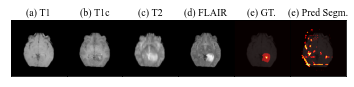

Patient name: BraTS20_Training_327
(array([ 60,  61,  61, ..., 130, 130, 130], dtype=int64), array([102,  82,  83, ..., 107, 108, 109], dtype=int64), array([73, 82, 84, ..., 74, 74, 74], dtype=int64))


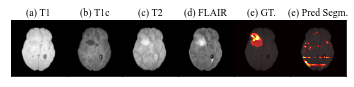

Patient name: BraTS20_Training_328
(array([ 58,  58,  58, ..., 160, 161, 161], dtype=int64), array([112, 113, 113, ...,  86,  84,  84], dtype=int64), array([48, 36, 46, ..., 80, 79, 80], dtype=int64))


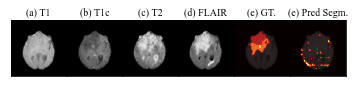

Patient name: BraTS20_Training_329
(array([ 62,  63,  63, ..., 120, 120, 121], dtype=int64), array([158, 151, 157, ..., 141, 141, 141], dtype=int64), array([55, 50, 52, ..., 81, 82, 82], dtype=int64))


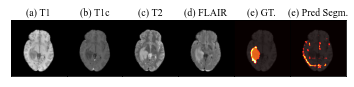

Patient name: BraTS20_Training_330
(array([121, 121, 121, ..., 173, 173, 174], dtype=int64), array([109, 110, 111, ..., 111, 112, 110], dtype=int64), array([69, 69, 69, ..., 68, 65, 62], dtype=int64))


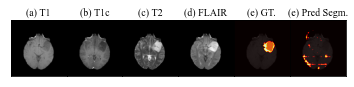

Patient name: BraTS20_Training_331
(array([129, 130, 131, ..., 183, 183, 183], dtype=int64), array([123, 120, 121, ..., 144, 144, 144], dtype=int64), array([56, 60, 59, ..., 59, 60, 61], dtype=int64))


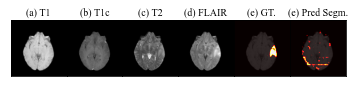

Patient name: BraTS20_Training_332
(array([123, 123, 123, ..., 172, 172, 172], dtype=int64), array([ 94,  94,  94, ..., 105, 105, 105], dtype=int64), array([112, 113, 114, ..., 100, 101, 102], dtype=int64))


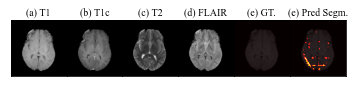

Patient name: BraTS20_Training_333
(array([116, 116, 116, ..., 184, 184, 184], dtype=int64), array([132, 132, 133, ..., 154, 155, 156], dtype=int64), array([75, 76, 73, ..., 68, 68, 68], dtype=int64))


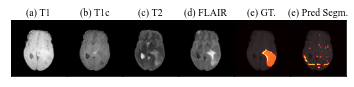

Patient name: BraTS20_Training_334
(array([ 54,  54,  54, ..., 118, 118, 118], dtype=int64), array([146, 146, 147, ..., 138, 138, 138], dtype=int64), array([60, 61, 60, ..., 84, 85, 86], dtype=int64))


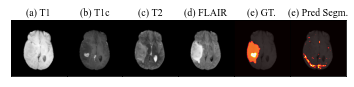

Patient name: BraTS20_Training_335
(array([109, 110, 110, ..., 177, 178, 178], dtype=int64), array([112, 112, 112, ..., 114, 113, 114], dtype=int64), array([58, 56, 57, ..., 54, 54, 54], dtype=int64))


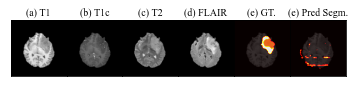

Patient name: BraTS20_Training_336
(array([114, 114, 114, ..., 162, 162, 162], dtype=int64), array([197, 197, 198, ..., 174, 174, 174], dtype=int64), array([79, 80, 77, ..., 78, 79, 80], dtype=int64))


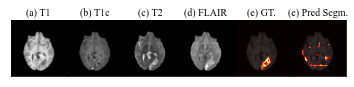

Patient name: BraTS20_Training_337
(array([ 67,  67,  67, ..., 124, 124, 124], dtype=int64), array([147, 147, 147, ..., 146, 147, 147], dtype=int64), array([93, 94, 95, ..., 88, 87, 88], dtype=int64))


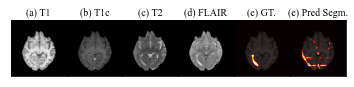

Patient name: BraTS20_Training_338
(array([ 61,  61,  61, ..., 131, 131, 132], dtype=int64), array([126, 126, 126, ..., 108, 108, 107], dtype=int64), array([82, 83, 84, ..., 76, 77, 77], dtype=int64))


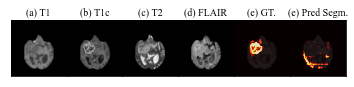

Patient name: BraTS20_Training_339
(array([ 60,  60,  60, ..., 149, 149, 149], dtype=int64), array([140, 140, 140, ..., 155, 156, 156], dtype=int64), array([ 85,  86,  87, ..., 108, 107, 108], dtype=int64))


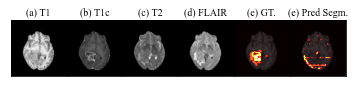

Patient name: BraTS20_Training_340
(array([ 88,  88,  88, ..., 146, 146, 161], dtype=int64), array([129, 129, 129, ..., 144, 144,  82], dtype=int64), array([ 87,  88,  89, ...,  99, 100,  98], dtype=int64))


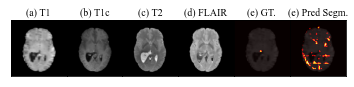

Patient name: BraTS20_Training_341
(array([155, 155, 155, ..., 182, 182, 182], dtype=int64), array([120, 120, 120, ..., 137, 137, 138], dtype=int64), array([57, 58, 59, ..., 57, 58, 57], dtype=int64))


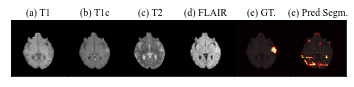

Patient name: BraTS20_Training_342
(array([ 58,  58,  58, ..., 147, 147, 147], dtype=int64), array([106, 106, 106, ..., 155, 155, 155], dtype=int64), array([59, 60, 61, ..., 80, 81, 82], dtype=int64))


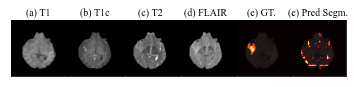

Patient name: BraTS20_Training_343
(array([ 51,  51,  51, ..., 110, 110, 110], dtype=int64), array([128, 128, 129, ..., 149, 149, 150], dtype=int64), array([71, 73, 71, ..., 66, 67, 66], dtype=int64))


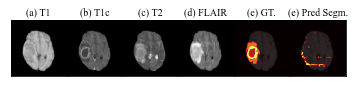

Patient name: BraTS20_Training_344
(array([127, 127, 127, ..., 239, 239, 239], dtype=int64), array([117, 117, 117, ..., 106, 106, 106], dtype=int64), array([69, 70, 71, ..., 56, 57, 58], dtype=int64))


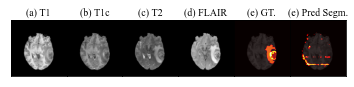

Patient name: BraTS20_Training_345
(array([ 52,  52,  52, ..., 121, 121, 121], dtype=int64), array([141, 141, 142, ..., 149, 149, 150], dtype=int64), array([69, 70, 69, ..., 76, 77, 76], dtype=int64))


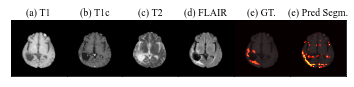

Patient name: BraTS20_Training_346
(array([ 73,  73,  73, ..., 136, 136, 140], dtype=int64), array([153, 153, 153, ..., 203, 203, 193], dtype=int64), array([102, 103, 104, ...,  57,  58,  59], dtype=int64))


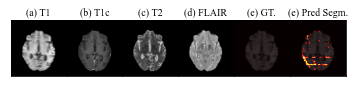

Patient name: BraTS20_Training_347
(array([ 70,  70,  70, ..., 127, 127, 127], dtype=int64), array([106, 106, 107, ..., 101, 102, 102], dtype=int64), array([104, 105, 103, ..., 104, 102, 103], dtype=int64))


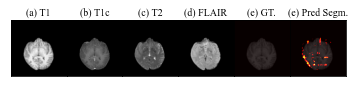

Patient name: BraTS20_Training_348
(array([116, 116, 116, ..., 164, 164, 164], dtype=int64), array([134, 134, 134, ..., 151, 151, 152], dtype=int64), array([79, 80, 81, ..., 86, 87, 85], dtype=int64))


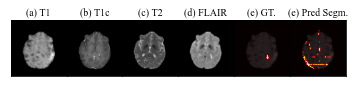

Patient name: BraTS20_Training_349
(array([ 62,  62,  62, ..., 143, 143, 143], dtype=int64), array([114, 114, 115, ...,  90,  90,  90], dtype=int64), array([93, 94, 89, ..., 84, 85, 86], dtype=int64))


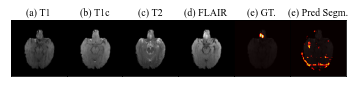

Patient name: BraTS20_Training_350
(array([ 70,  70,  70, ..., 128, 128, 129], dtype=int64), array([157, 157, 158, ..., 154, 155, 153], dtype=int64), array([ 85,  86,  84, ..., 119, 119, 119], dtype=int64))


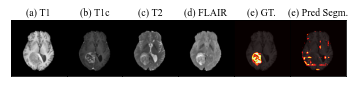

Patient name: BraTS20_Training_351
(array([ 97,  97, 101, ..., 181, 181, 181], dtype=int64), array([186, 187, 195, ..., 136, 137, 137], dtype=int64), array([57, 57, 65, ..., 54, 52, 53], dtype=int64))


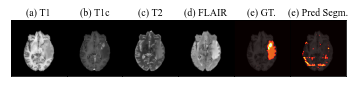

Patient name: BraTS20_Training_352
(array([ 63,  63,  63, ..., 105, 105, 105], dtype=int64), array([165, 165, 166, ..., 196, 196, 197], dtype=int64), array([110, 111, 108, ..., 108, 109, 100], dtype=int64))


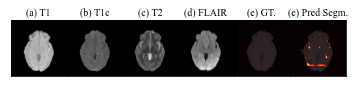

Patient name: BraTS20_Training_353
(array([131, 131, 131, ..., 179, 179, 179], dtype=int64), array([193, 193, 194, ..., 165, 166, 166], dtype=int64), array([51, 52, 51, ..., 62, 59, 60], dtype=int64))


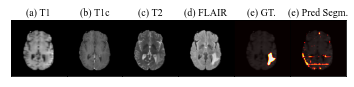

Patient name: BraTS20_Training_354
(array([ 50,  50,  50, ..., 124, 124, 124], dtype=int64), array([134, 134, 134, ..., 137, 137, 137], dtype=int64), array([55, 56, 57, ..., 69, 70, 71], dtype=int64))


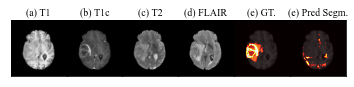

Patient name: BraTS20_Training_355
(array([ 67,  67,  67, ..., 124, 124, 124], dtype=int64), array([116, 116, 116, ..., 117, 117, 118], dtype=int64), array([ 99, 100, 101, ...,  94,  95,  94], dtype=int64))


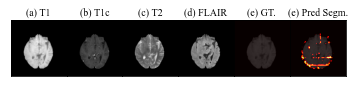

Patient name: BraTS20_Training_356
(array([136, 136, 136, ..., 174, 174, 174], dtype=int64), array([181, 181, 182, ..., 175, 175, 175], dtype=int64), array([81, 82, 79, ..., 66, 67, 68], dtype=int64))


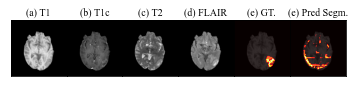

Patient name: BraTS20_Training_357
(array([ 64,  64,  64, ..., 114, 114, 114], dtype=int64), array([119, 119, 120, ..., 127, 128, 128], dtype=int64), array([87, 88, 83, ..., 87, 85, 87], dtype=int64))


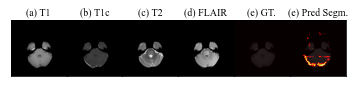

Patient name: BraTS20_Training_358
(array([ 56,  56,  56, ..., 113, 113, 113], dtype=int64), array([140, 140, 140, ..., 111, 112, 113], dtype=int64), array([64, 65, 66, ..., 63, 63, 63], dtype=int64))


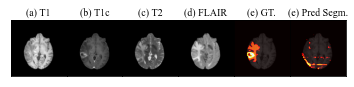

Patient name: BraTS20_Training_359


KeyboardInterrupt: 

In [23]:
model_folder = "20210321-070858_brats20_3d_small_training_2_lr_0.0001_epochs_70_epochbatch_75_epoch_NEWPREPROCESS_30"
seg_output_path = f'{path_to_this_repo_folder}segmentation_output/{model_folder}/Brats20TrainingDataUPDATED_NEWPREPROCESS/'

training_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_TrainingData/'
patient_list = [i for i in os.listdir(training_data_path) if i != "survival_evaluation.csv" or i != "name_mapping.csv"]
patient_list = patient_list[300:]

for patient_name in patient_list:
    print(f"Patient name: {patient_name}")
    patient_t1 = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_t1.nii.gz').get_fdata()
    patient_t1c = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_t1ce.nii.gz').get_fdata()
    patient_t2 = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_t2.nii.gz').get_fdata()
    patient_flair = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_flair.nii.gz').get_fdata()
    patient_seg = nib.load(training_data_path+ f'{patient_name}/' + f"{patient_name}_seg.nii.gz").get_fdata()
    predicted_seg = nib.load(seg_output_path+ f"{patient_name}.nii.gz").get_fdata()

    fig, axs = plt.subplots(1, 6, frameon=False)
    slice_nr = 65
    print(patient_seg.nonzero())
    # Remove horizontal space between axes
    fig.subplots_adjust(wspace=0)

    subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

    subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

    subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

    subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

    subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[4], patient_seg[:,:,slice_nr], '(e) GT.', alpha=0.8)
    
    subimage(axs[5], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[5], predicted_seg[:,:,slice_nr], '(e) Pred Segm.', alpha=0.8)

#     plt.savefig(f'figures/LMAO{patient_name}.jpg', dpi=400, bbox_inches='tight', pad_inches=0)

    plt.show()


Patient name: BraTS20_Training_301
(array([ 96,  96,  96, ..., 168, 168, 168], dtype=int64), array([95, 95, 96, ..., 93, 93, 93], dtype=int64), array([97, 98, 96, ..., 90, 91, 92], dtype=int64))


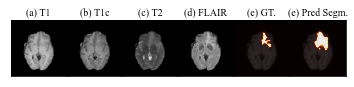

Patient name: BraTS20_Training_302
(array([ 50,  50,  50, ..., 102, 103, 106], dtype=int64), array([124, 125, 126, ..., 116, 114, 122], dtype=int64), array([55, 55, 55, ..., 59, 58, 63], dtype=int64))


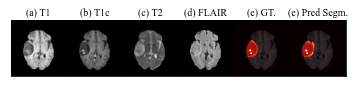

Patient name: BraTS20_Training_303
(array([116, 116, 116, ..., 156, 156, 156], dtype=int64), array([ 95,  96,  97, ...,  65,  66, 103], dtype=int64), array([122, 122, 122, ...,  86,  86, 110], dtype=int64))


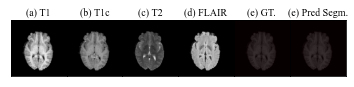

Patient name: BraTS20_Training_304
(array([ 74,  74,  74, ..., 114, 114, 114], dtype=int64), array([105, 110, 111, ..., 119, 119, 119], dtype=int64), array([48, 52, 52, ..., 53, 54, 55], dtype=int64))


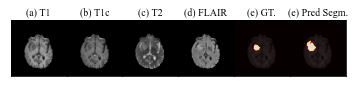

Patient name: BraTS20_Training_305
(array([ 73,  73,  73, ..., 145, 146, 147], dtype=int64), array([91, 91, 91, ..., 99, 91, 92], dtype=int64), array([92, 93, 94, ..., 97, 97, 95], dtype=int64))


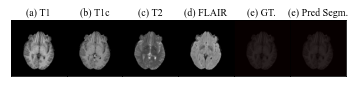

Patient name: BraTS20_Training_306
(array([ 97,  97,  98, ..., 176, 176, 176], dtype=int64), array([120, 120, 118, ..., 108, 109, 110], dtype=int64), array([93, 94, 93, ..., 96, 96, 96], dtype=int64))


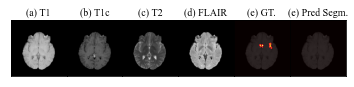

Patient name: BraTS20_Training_307
(array([ 62,  63,  63, ..., 132, 132, 132], dtype=int64), array([121, 117, 118, ..., 101, 101, 106], dtype=int64), array([63, 56, 56, ..., 69, 70, 68], dtype=int64))


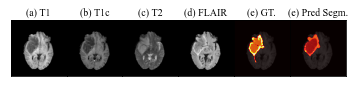

Patient name: BraTS20_Training_308
(array([ 54,  55,  55, ..., 145, 145, 145], dtype=int64), array([123, 121, 121, ...,  93,  93,  94], dtype=int64), array([83, 79, 80, ..., 91, 92, 92], dtype=int64))


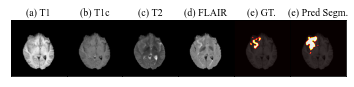

Patient name: BraTS20_Training_309
(array([108, 108, 109, ..., 182, 182, 182], dtype=int64), array([112, 112, 100, ..., 138, 139, 139], dtype=int64), array([60, 61, 64, ..., 62, 61, 62], dtype=int64))


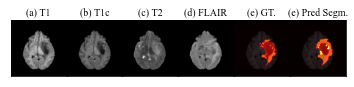

Patient name: BraTS20_Training_310
(array([ 64,  64,  65, ..., 143, 143, 143], dtype=int64), array([108, 109, 103, ...,  87,  87,  88], dtype=int64), array([71, 72, 70, ..., 73, 74, 74], dtype=int64))


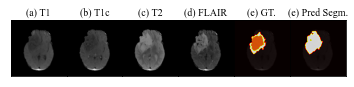

Patient name: BraTS20_Training_311
(array([127, 127, 127, ..., 173, 173, 173], dtype=int64), array([123, 123, 123, ..., 132, 132, 134], dtype=int64), array([117, 118, 119, ..., 105, 106, 106], dtype=int64))


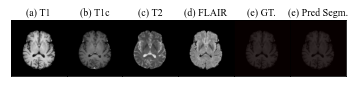

Patient name: BraTS20_Training_312
(array([ 88,  88,  89, ..., 157, 157, 157], dtype=int64), array([ 98,  99,  89, ..., 101, 102, 102], dtype=int64), array([95, 95, 94, ..., 90, 88, 89], dtype=int64))


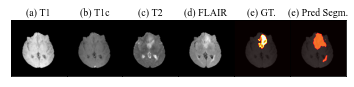

Patient name: BraTS20_Training_313
(array([ 70,  70,  71, ..., 141, 141, 141], dtype=int64), array([114, 121, 109, ..., 116, 117, 118], dtype=int64), array([ 99, 104,  99, ...,  93,  93,  92], dtype=int64))


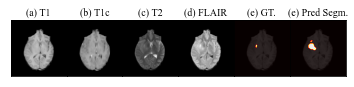

Patient name: BraTS20_Training_314
(array([124, 124, 126, ..., 175, 175, 175], dtype=int64), array([186, 187, 184, ..., 172, 173, 174], dtype=int64), array([100, 100,  91, ...,  87,  85,  86], dtype=int64))


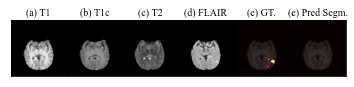

Patient name: BraTS20_Training_315
(array([136, 136, 136, ..., 174, 174, 174], dtype=int64), array([128, 128, 128, ..., 123, 124, 125], dtype=int64), array([105, 106, 107, ..., 100,  99,  99], dtype=int64))


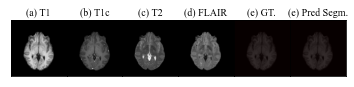

Patient name: BraTS20_Training_316
(array([ 62,  62,  62, ..., 159, 159, 159], dtype=int64), array([111, 112, 113, ..., 106, 107, 108], dtype=int64), array([71, 71, 71, ..., 78, 79, 80], dtype=int64))


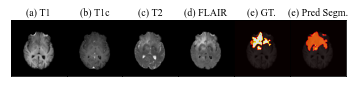

Patient name: BraTS20_Training_317
(array([152, 152, 152, ..., 186, 187, 187], dtype=int64), array([160, 161, 162, ..., 157, 151, 152], dtype=int64), array([85, 85, 85, ..., 68, 70, 70], dtype=int64))


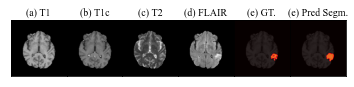

Patient name: BraTS20_Training_318
(array([ 57,  57,  57, ..., 146, 146, 146], dtype=int64), array([105, 106, 106, ...,  94,  99, 100], dtype=int64), array([82, 82, 86, ..., 83, 88, 88], dtype=int64))


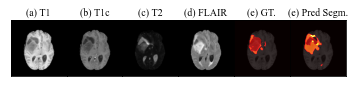

Patient name: BraTS20_Training_319
(array([ 53,  53,  53, ..., 112, 112, 112], dtype=int64), array([127, 128, 129, ..., 115, 116, 116], dtype=int64), array([66, 66, 66, ..., 68, 67, 68], dtype=int64))


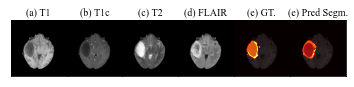

Patient name: BraTS20_Training_320
(array([ 58,  58,  58, ..., 116, 116, 116], dtype=int64), array([109, 109, 109, ..., 103, 104, 105], dtype=int64), array([78, 79, 80, ..., 66, 66, 65], dtype=int64))


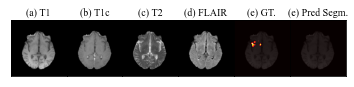

Patient name: BraTS20_Training_321
(array([ 77, 113, 115, ..., 153, 153, 170], dtype=int64), array([138,  96, 111, ..., 140, 142, 147], dtype=int64), array([121, 104, 104, ..., 119, 128,  97], dtype=int64))


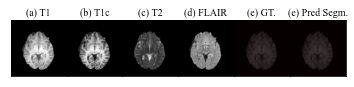

Patient name: BraTS20_Training_322
(array([122, 123, 123, ..., 183, 183, 183], dtype=int64), array([103, 102, 102, ..., 117, 117, 122], dtype=int64), array([57, 57, 58, ..., 54, 55, 47], dtype=int64))


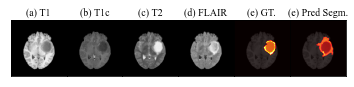

Patient name: BraTS20_Training_323
(array([ 49,  49,  49, ..., 131, 131, 131], dtype=int64), array([122, 123, 123, ..., 148, 149, 150], dtype=int64), array([56, 56, 58, ..., 78, 76, 76], dtype=int64))


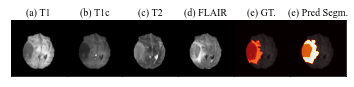

Patient name: BraTS20_Training_324
(array([ 66,  66,  66, ..., 120, 120, 121], dtype=int64), array([ 82,  83,  84, ..., 100, 100,  97], dtype=int64), array([73, 73, 73, ..., 53, 54, 53], dtype=int64))


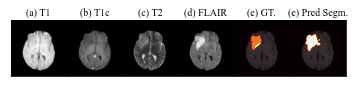

Patient name: BraTS20_Training_325
(array([ 98,  98,  98, ..., 131, 131, 132], dtype=int64), array([154, 155, 155, ..., 164, 165, 163], dtype=int64), array([34, 32, 33, ..., 43, 43, 43], dtype=int64))


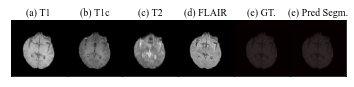

Patient name: BraTS20_Training_326
(array([111, 111, 111, ..., 168, 168, 168], dtype=int64), array([150, 151, 151, ..., 160, 161, 162], dtype=int64), array([ 85,  85,  86, ..., 113, 113, 113], dtype=int64))


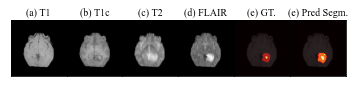

Patient name: BraTS20_Training_327
(array([ 60,  61,  61, ..., 130, 130, 130], dtype=int64), array([102,  82,  83, ..., 107, 108, 109], dtype=int64), array([73, 82, 84, ..., 74, 74, 74], dtype=int64))


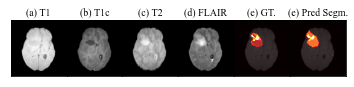

Patient name: BraTS20_Training_328
(array([ 58,  58,  58, ..., 160, 161, 161], dtype=int64), array([112, 113, 113, ...,  86,  84,  84], dtype=int64), array([48, 36, 46, ..., 80, 79, 80], dtype=int64))


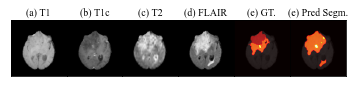

Patient name: BraTS20_Training_329
(array([ 62,  63,  63, ..., 120, 120, 121], dtype=int64), array([158, 151, 157, ..., 141, 141, 141], dtype=int64), array([55, 50, 52, ..., 81, 82, 82], dtype=int64))


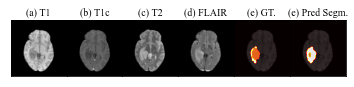

Patient name: BraTS20_Training_330
(array([121, 121, 121, ..., 173, 173, 174], dtype=int64), array([109, 110, 111, ..., 111, 112, 110], dtype=int64), array([69, 69, 69, ..., 68, 65, 62], dtype=int64))


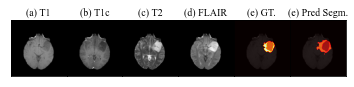

Patient name: BraTS20_Training_331
(array([129, 130, 131, ..., 183, 183, 183], dtype=int64), array([123, 120, 121, ..., 144, 144, 144], dtype=int64), array([56, 60, 59, ..., 59, 60, 61], dtype=int64))


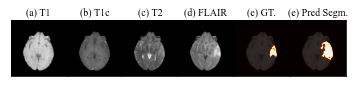

Patient name: BraTS20_Training_332
(array([123, 123, 123, ..., 172, 172, 172], dtype=int64), array([ 94,  94,  94, ..., 105, 105, 105], dtype=int64), array([112, 113, 114, ..., 100, 101, 102], dtype=int64))


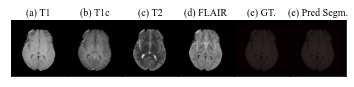

Patient name: BraTS20_Training_333
(array([116, 116, 116, ..., 184, 184, 184], dtype=int64), array([132, 132, 133, ..., 154, 155, 156], dtype=int64), array([75, 76, 73, ..., 68, 68, 68], dtype=int64))


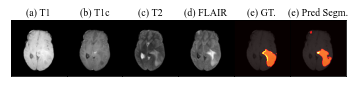

Patient name: BraTS20_Training_334
(array([ 54,  54,  54, ..., 118, 118, 118], dtype=int64), array([146, 146, 147, ..., 138, 138, 138], dtype=int64), array([60, 61, 60, ..., 84, 85, 86], dtype=int64))


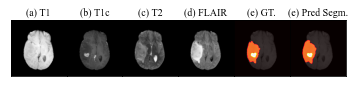

Patient name: BraTS20_Training_335
(array([109, 110, 110, ..., 177, 178, 178], dtype=int64), array([112, 112, 112, ..., 114, 113, 114], dtype=int64), array([58, 56, 57, ..., 54, 54, 54], dtype=int64))


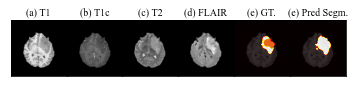

Patient name: BraTS20_Training_336
(array([114, 114, 114, ..., 162, 162, 162], dtype=int64), array([197, 197, 198, ..., 174, 174, 174], dtype=int64), array([79, 80, 77, ..., 78, 79, 80], dtype=int64))


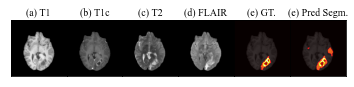

Patient name: BraTS20_Training_337
(array([ 67,  67,  67, ..., 124, 124, 124], dtype=int64), array([147, 147, 147, ..., 146, 147, 147], dtype=int64), array([93, 94, 95, ..., 88, 87, 88], dtype=int64))


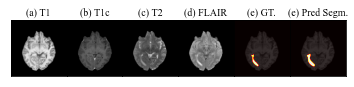

Patient name: BraTS20_Training_338
(array([ 61,  61,  61, ..., 131, 131, 132], dtype=int64), array([126, 126, 126, ..., 108, 108, 107], dtype=int64), array([82, 83, 84, ..., 76, 77, 77], dtype=int64))


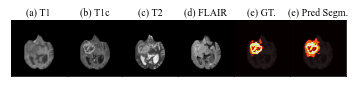

Patient name: BraTS20_Training_339
(array([ 60,  60,  60, ..., 149, 149, 149], dtype=int64), array([140, 140, 140, ..., 155, 156, 156], dtype=int64), array([ 85,  86,  87, ..., 108, 107, 108], dtype=int64))


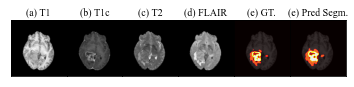

Patient name: BraTS20_Training_340
(array([ 88,  88,  88, ..., 146, 146, 161], dtype=int64), array([129, 129, 129, ..., 144, 144,  82], dtype=int64), array([ 87,  88,  89, ...,  99, 100,  98], dtype=int64))


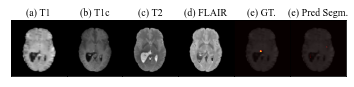

Patient name: BraTS20_Training_341
(array([155, 155, 155, ..., 182, 182, 182], dtype=int64), array([120, 120, 120, ..., 137, 137, 138], dtype=int64), array([57, 58, 59, ..., 57, 58, 57], dtype=int64))


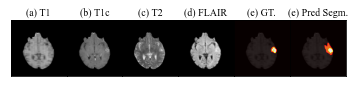

Patient name: BraTS20_Training_342
(array([ 58,  58,  58, ..., 147, 147, 147], dtype=int64), array([106, 106, 106, ..., 155, 155, 155], dtype=int64), array([59, 60, 61, ..., 80, 81, 82], dtype=int64))


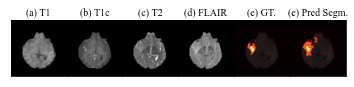

Patient name: BraTS20_Training_343
(array([ 51,  51,  51, ..., 110, 110, 110], dtype=int64), array([128, 128, 129, ..., 149, 149, 150], dtype=int64), array([71, 73, 71, ..., 66, 67, 66], dtype=int64))


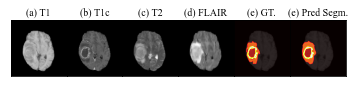

Patient name: BraTS20_Training_344
(array([127, 127, 127, ..., 239, 239, 239], dtype=int64), array([117, 117, 117, ..., 106, 106, 106], dtype=int64), array([69, 70, 71, ..., 56, 57, 58], dtype=int64))


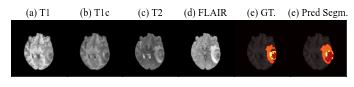

Patient name: BraTS20_Training_345
(array([ 52,  52,  52, ..., 121, 121, 121], dtype=int64), array([141, 141, 142, ..., 149, 149, 150], dtype=int64), array([69, 70, 69, ..., 76, 77, 76], dtype=int64))


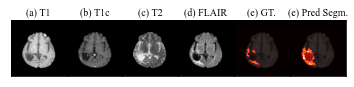

Patient name: BraTS20_Training_346
(array([ 73,  73,  73, ..., 136, 136, 140], dtype=int64), array([153, 153, 153, ..., 203, 203, 193], dtype=int64), array([102, 103, 104, ...,  57,  58,  59], dtype=int64))


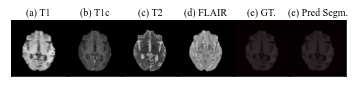

Patient name: BraTS20_Training_347
(array([ 70,  70,  70, ..., 127, 127, 127], dtype=int64), array([106, 106, 107, ..., 101, 102, 102], dtype=int64), array([104, 105, 103, ..., 104, 102, 103], dtype=int64))


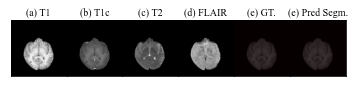

Patient name: BraTS20_Training_348
(array([116, 116, 116, ..., 164, 164, 164], dtype=int64), array([134, 134, 134, ..., 151, 151, 152], dtype=int64), array([79, 80, 81, ..., 86, 87, 85], dtype=int64))


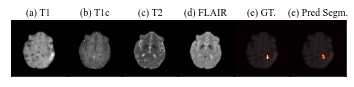

Patient name: BraTS20_Training_349
(array([ 62,  62,  62, ..., 143, 143, 143], dtype=int64), array([114, 114, 115, ...,  90,  90,  90], dtype=int64), array([93, 94, 89, ..., 84, 85, 86], dtype=int64))


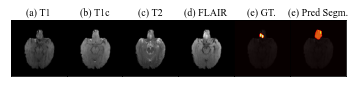

Patient name: BraTS20_Training_350
(array([ 70,  70,  70, ..., 128, 128, 129], dtype=int64), array([157, 157, 158, ..., 154, 155, 153], dtype=int64), array([ 85,  86,  84, ..., 119, 119, 119], dtype=int64))


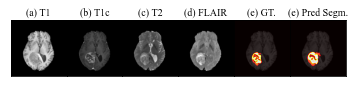

Patient name: BraTS20_Training_351
(array([ 97,  97, 101, ..., 181, 181, 181], dtype=int64), array([186, 187, 195, ..., 136, 137, 137], dtype=int64), array([57, 57, 65, ..., 54, 52, 53], dtype=int64))


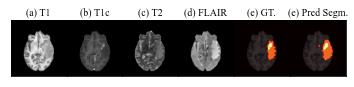

Patient name: BraTS20_Training_352
(array([ 63,  63,  63, ..., 105, 105, 105], dtype=int64), array([165, 165, 166, ..., 196, 196, 197], dtype=int64), array([110, 111, 108, ..., 108, 109, 100], dtype=int64))


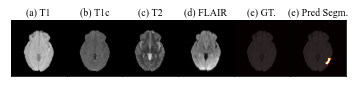

Patient name: BraTS20_Training_353
(array([131, 131, 131, ..., 179, 179, 179], dtype=int64), array([193, 193, 194, ..., 165, 166, 166], dtype=int64), array([51, 52, 51, ..., 62, 59, 60], dtype=int64))


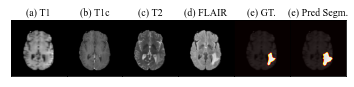

Patient name: BraTS20_Training_354
(array([ 50,  50,  50, ..., 124, 124, 124], dtype=int64), array([134, 134, 134, ..., 137, 137, 137], dtype=int64), array([55, 56, 57, ..., 69, 70, 71], dtype=int64))


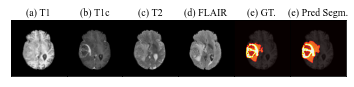

Patient name: BraTS20_Training_355
(array([ 67,  67,  67, ..., 124, 124, 124], dtype=int64), array([116, 116, 116, ..., 117, 117, 118], dtype=int64), array([ 99, 100, 101, ...,  94,  95,  94], dtype=int64))


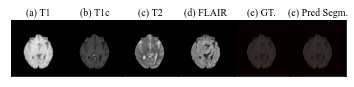

Patient name: BraTS20_Training_356
(array([136, 136, 136, ..., 174, 174, 174], dtype=int64), array([181, 181, 182, ..., 175, 175, 175], dtype=int64), array([81, 82, 79, ..., 66, 67, 68], dtype=int64))


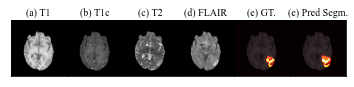

Patient name: BraTS20_Training_357
(array([ 64,  64,  64, ..., 114, 114, 114], dtype=int64), array([119, 119, 120, ..., 127, 128, 128], dtype=int64), array([87, 88, 83, ..., 87, 85, 87], dtype=int64))


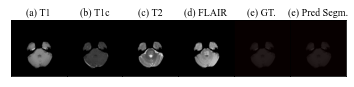

Patient name: BraTS20_Training_358
(array([ 56,  56,  56, ..., 113, 113, 113], dtype=int64), array([140, 140, 140, ..., 111, 112, 113], dtype=int64), array([64, 65, 66, ..., 63, 63, 63], dtype=int64))


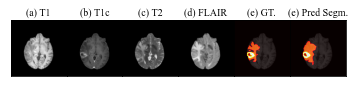

Patient name: BraTS20_Training_359
(array([ 56,  56,  56, ..., 106, 106, 147], dtype=int64), array([142, 142, 143, ..., 157, 157, 173], dtype=int64), array([93, 94, 92, ..., 90, 91, 69], dtype=int64))


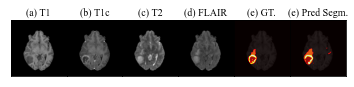

Patient name: BraTS20_Training_360
(array([ 61,  61,  61, ..., 123, 123, 123], dtype=int64), array([109, 109, 109, ..., 103, 104, 104], dtype=int64), array([101, 102, 103, ..., 107,  99, 100], dtype=int64))


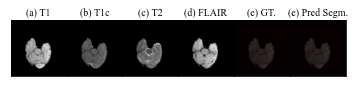

Patient name: BraTS20_Training_361
(array([116, 116, 116, ..., 168, 168, 168], dtype=int64), array([183, 183, 183, ..., 163, 163, 164], dtype=int64), array([ 98,  99, 100, ..., 112, 113, 112], dtype=int64))


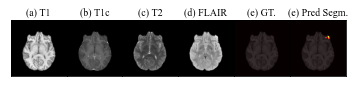

Patient name: BraTS20_Training_362
(array([119, 119, 119, ..., 182, 182, 182], dtype=int64), array([133, 134, 134, ..., 138, 138, 139], dtype=int64), array([68, 67, 68, ..., 57, 58, 57], dtype=int64))


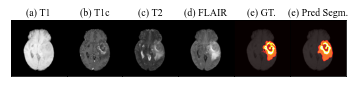

Patient name: BraTS20_Training_363
(array([122, 122, 122, ..., 184, 184, 184], dtype=int64), array([127, 127, 127, ..., 131, 131, 131], dtype=int64), array([95, 96, 97, ..., 66, 67, 68], dtype=int64))


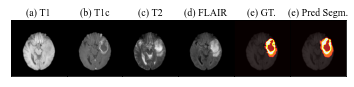

Patient name: BraTS20_Training_364
(array([ 53,  53,  53, ..., 104, 104, 104], dtype=int64), array([132, 132, 133, ..., 156, 157, 157], dtype=int64), array([53, 54, 52, ..., 90, 88, 89], dtype=int64))


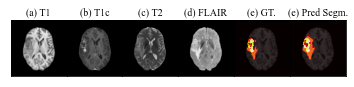

Patient name: BraTS20_Training_365
(array([ 56,  56,  56, ..., 123, 123, 123], dtype=int64), array([140, 140, 140, ..., 133, 133, 133], dtype=int64), array([87, 88, 89, ..., 81, 82, 83], dtype=int64))


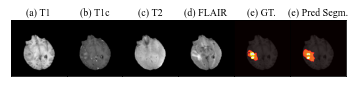

Patient name: BraTS20_Training_366
(array([122, 122, 122, ..., 168, 168, 168], dtype=int64), array([203, 203, 203, ..., 178, 178, 178], dtype=int64), array([92, 93, 94, ..., 86, 87, 88], dtype=int64))


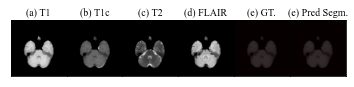

Patient name: BraTS20_Training_367
(array([ 47,  48,  48, ..., 150, 151, 151], dtype=int64), array([153, 146, 147, ..., 181, 181, 181], dtype=int64), array([69, 69, 68, ..., 73, 72, 73], dtype=int64))


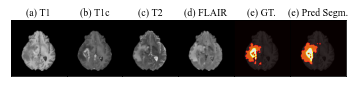

Patient name: BraTS20_Training_368
(array([124, 124, 124, ..., 180, 180, 180], dtype=int64), array([143, 143, 143, ..., 160, 160, 161], dtype=int64), array([85, 86, 87, ..., 77, 78, 75], dtype=int64))


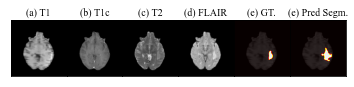

Patient name: BraTS20_Training_369
(array([ 66,  66,  66, ..., 182, 182, 183], dtype=int64), array([108, 109, 109, ..., 173, 173, 171], dtype=int64), array([103, 103, 104, ...,  81,  82,  80], dtype=int64))


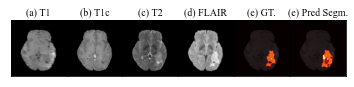

Patient name: name_mapping.csv


FileNotFoundError: No such file or no access: 'C:/Users/JiachennCJC/Documents/GitHub/brats-pretraining_jiachenn/MICCAI_BraTS2020_TrainingData/name_mapping.csv/name_mapping.csv_t1.nii.gz'

In [4]:
model_folder = "20210321-070858_brats20_3d_small_training_2_lr_0.0001_epochs_70_epochbatch_75_epoch_UPGRADEDTRAININGDUMMY_10"
seg_output_path = f'{path_to_this_repo_folder}segmentation_output/{model_folder}/Brats20TrainingData/'

training_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_TrainingData/'
patient_list = [i for i in os.listdir(training_data_path) if i != "survival_evaluation.csv" or i != "name_mapping.csv"]
patient_list = patient_list[300:]

for patient_name in patient_list:
    print(f"Patient name: {patient_name}")
    patient_t1 = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_t1.nii.gz').get_fdata()
    patient_t1c = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_t1ce.nii.gz').get_fdata()
    patient_t2 = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_t2.nii.gz').get_fdata()
    patient_flair = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_flair.nii.gz').get_fdata()
    patient_seg = nib.load(training_data_path+ f'{patient_name}/' + f"{patient_name}_seg.nii.gz").get_fdata()
    predicted_seg = nib.load(seg_output_path+ f"{patient_name}.nii.gz").get_fdata()

    fig, axs = plt.subplots(1, 6, frameon=False)
    slice_nr = 65
    print(patient_seg.nonzero())
    # Remove horizontal space between axes
    fig.subplots_adjust(wspace=0)

    subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

    subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

    subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

    subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

    subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[4], patient_seg[:,:,slice_nr], '(e) GT.', alpha=0.8)
    
    subimage(axs[5], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[5], predicted_seg[:,:,slice_nr], '(e) Pred Segm.', alpha=0.8)

#     plt.savefig(f'figures/LMAO{patient_name}.jpg', dpi=400, bbox_inches='tight', pad_inches=0)

    plt.show()


### This is the expected output on cases 301-369


Patient name: BraTS20_Training_301
(array([ 96,  96,  96, ..., 168, 168, 168], dtype=int64), array([95, 95, 96, ..., 93, 93, 93], dtype=int64), array([97, 98, 96, ..., 90, 91, 92], dtype=int64))


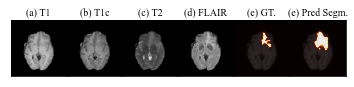

Patient name: BraTS20_Training_302
(array([ 50,  50,  50, ..., 102, 103, 106], dtype=int64), array([124, 125, 126, ..., 116, 114, 122], dtype=int64), array([55, 55, 55, ..., 59, 58, 63], dtype=int64))


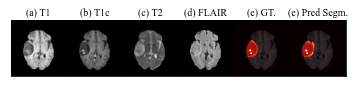

Patient name: BraTS20_Training_303
(array([116, 116, 116, ..., 156, 156, 156], dtype=int64), array([ 95,  96,  97, ...,  65,  66, 103], dtype=int64), array([122, 122, 122, ...,  86,  86, 110], dtype=int64))


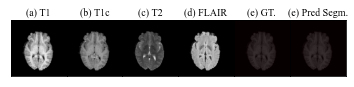

Patient name: BraTS20_Training_304
(array([ 74,  74,  74, ..., 114, 114, 114], dtype=int64), array([105, 110, 111, ..., 119, 119, 119], dtype=int64), array([48, 52, 52, ..., 53, 54, 55], dtype=int64))


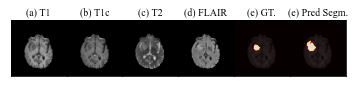

Patient name: BraTS20_Training_305
(array([ 73,  73,  73, ..., 145, 146, 147], dtype=int64), array([91, 91, 91, ..., 99, 91, 92], dtype=int64), array([92, 93, 94, ..., 97, 97, 95], dtype=int64))


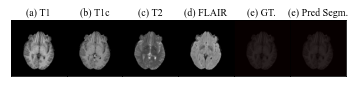

Patient name: BraTS20_Training_306
(array([ 97,  97,  98, ..., 176, 176, 176], dtype=int64), array([120, 120, 118, ..., 108, 109, 110], dtype=int64), array([93, 94, 93, ..., 96, 96, 96], dtype=int64))


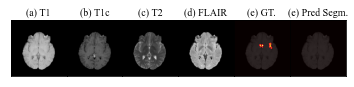

Patient name: BraTS20_Training_307
(array([ 62,  63,  63, ..., 132, 132, 132], dtype=int64), array([121, 117, 118, ..., 101, 101, 106], dtype=int64), array([63, 56, 56, ..., 69, 70, 68], dtype=int64))


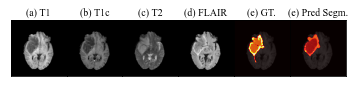

Patient name: BraTS20_Training_308
(array([ 54,  55,  55, ..., 145, 145, 145], dtype=int64), array([123, 121, 121, ...,  93,  93,  94], dtype=int64), array([83, 79, 80, ..., 91, 92, 92], dtype=int64))


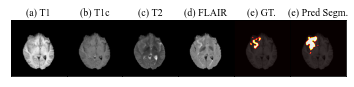

Patient name: BraTS20_Training_309
(array([108, 108, 109, ..., 182, 182, 182], dtype=int64), array([112, 112, 100, ..., 138, 139, 139], dtype=int64), array([60, 61, 64, ..., 62, 61, 62], dtype=int64))


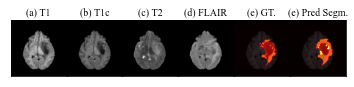

Patient name: BraTS20_Training_310
(array([ 64,  64,  65, ..., 143, 143, 143], dtype=int64), array([108, 109, 103, ...,  87,  87,  88], dtype=int64), array([71, 72, 70, ..., 73, 74, 74], dtype=int64))


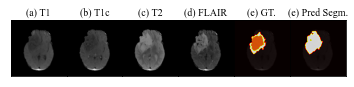

Patient name: BraTS20_Training_311
(array([127, 127, 127, ..., 173, 173, 173], dtype=int64), array([123, 123, 123, ..., 132, 132, 134], dtype=int64), array([117, 118, 119, ..., 105, 106, 106], dtype=int64))


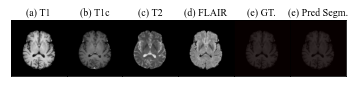

Patient name: BraTS20_Training_312
(array([ 88,  88,  89, ..., 157, 157, 157], dtype=int64), array([ 98,  99,  89, ..., 101, 102, 102], dtype=int64), array([95, 95, 94, ..., 90, 88, 89], dtype=int64))


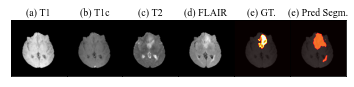

Patient name: BraTS20_Training_313
(array([ 70,  70,  71, ..., 141, 141, 141], dtype=int64), array([114, 121, 109, ..., 116, 117, 118], dtype=int64), array([ 99, 104,  99, ...,  93,  93,  92], dtype=int64))


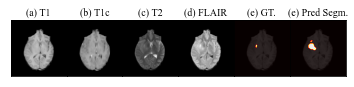

Patient name: BraTS20_Training_314
(array([124, 124, 126, ..., 175, 175, 175], dtype=int64), array([186, 187, 184, ..., 172, 173, 174], dtype=int64), array([100, 100,  91, ...,  87,  85,  86], dtype=int64))


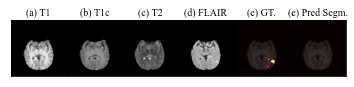

Patient name: BraTS20_Training_315
(array([136, 136, 136, ..., 174, 174, 174], dtype=int64), array([128, 128, 128, ..., 123, 124, 125], dtype=int64), array([105, 106, 107, ..., 100,  99,  99], dtype=int64))


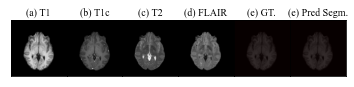

Patient name: BraTS20_Training_316
(array([ 62,  62,  62, ..., 159, 159, 159], dtype=int64), array([111, 112, 113, ..., 106, 107, 108], dtype=int64), array([71, 71, 71, ..., 78, 79, 80], dtype=int64))


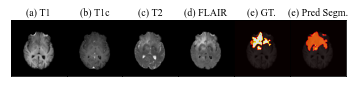

Patient name: BraTS20_Training_317
(array([152, 152, 152, ..., 186, 187, 187], dtype=int64), array([160, 161, 162, ..., 157, 151, 152], dtype=int64), array([85, 85, 85, ..., 68, 70, 70], dtype=int64))


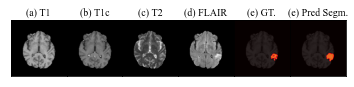

Patient name: BraTS20_Training_318
(array([ 57,  57,  57, ..., 146, 146, 146], dtype=int64), array([105, 106, 106, ...,  94,  99, 100], dtype=int64), array([82, 82, 86, ..., 83, 88, 88], dtype=int64))


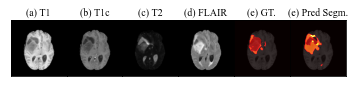

Patient name: BraTS20_Training_319
(array([ 53,  53,  53, ..., 112, 112, 112], dtype=int64), array([127, 128, 129, ..., 115, 116, 116], dtype=int64), array([66, 66, 66, ..., 68, 67, 68], dtype=int64))


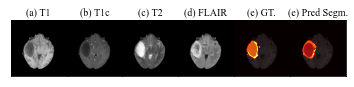

Patient name: BraTS20_Training_320
(array([ 58,  58,  58, ..., 116, 116, 116], dtype=int64), array([109, 109, 109, ..., 103, 104, 105], dtype=int64), array([78, 79, 80, ..., 66, 66, 65], dtype=int64))


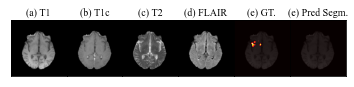

Patient name: BraTS20_Training_321
(array([ 77, 113, 115, ..., 153, 153, 170], dtype=int64), array([138,  96, 111, ..., 140, 142, 147], dtype=int64), array([121, 104, 104, ..., 119, 128,  97], dtype=int64))


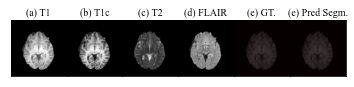

Patient name: BraTS20_Training_322
(array([122, 123, 123, ..., 183, 183, 183], dtype=int64), array([103, 102, 102, ..., 117, 117, 122], dtype=int64), array([57, 57, 58, ..., 54, 55, 47], dtype=int64))


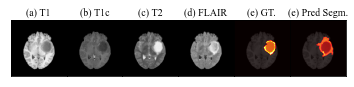

Patient name: BraTS20_Training_323
(array([ 49,  49,  49, ..., 131, 131, 131], dtype=int64), array([122, 123, 123, ..., 148, 149, 150], dtype=int64), array([56, 56, 58, ..., 78, 76, 76], dtype=int64))


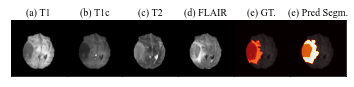

Patient name: BraTS20_Training_324
(array([ 66,  66,  66, ..., 120, 120, 121], dtype=int64), array([ 82,  83,  84, ..., 100, 100,  97], dtype=int64), array([73, 73, 73, ..., 53, 54, 53], dtype=int64))


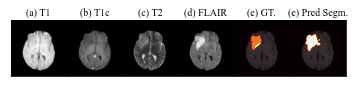

Patient name: BraTS20_Training_325
(array([ 98,  98,  98, ..., 131, 131, 132], dtype=int64), array([154, 155, 155, ..., 164, 165, 163], dtype=int64), array([34, 32, 33, ..., 43, 43, 43], dtype=int64))


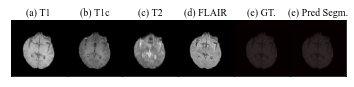

Patient name: BraTS20_Training_326
(array([111, 111, 111, ..., 168, 168, 168], dtype=int64), array([150, 151, 151, ..., 160, 161, 162], dtype=int64), array([ 85,  85,  86, ..., 113, 113, 113], dtype=int64))


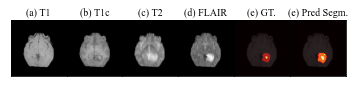

Patient name: BraTS20_Training_327
(array([ 60,  61,  61, ..., 130, 130, 130], dtype=int64), array([102,  82,  83, ..., 107, 108, 109], dtype=int64), array([73, 82, 84, ..., 74, 74, 74], dtype=int64))


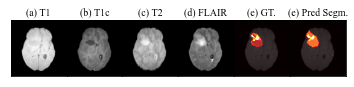

Patient name: BraTS20_Training_328
(array([ 58,  58,  58, ..., 160, 161, 161], dtype=int64), array([112, 113, 113, ...,  86,  84,  84], dtype=int64), array([48, 36, 46, ..., 80, 79, 80], dtype=int64))


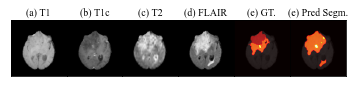

Patient name: BraTS20_Training_329
(array([ 62,  63,  63, ..., 120, 120, 121], dtype=int64), array([158, 151, 157, ..., 141, 141, 141], dtype=int64), array([55, 50, 52, ..., 81, 82, 82], dtype=int64))


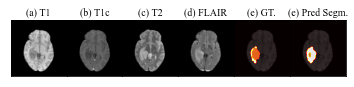

Patient name: BraTS20_Training_330
(array([121, 121, 121, ..., 173, 173, 174], dtype=int64), array([109, 110, 111, ..., 111, 112, 110], dtype=int64), array([69, 69, 69, ..., 68, 65, 62], dtype=int64))


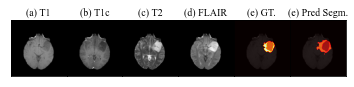

Patient name: BraTS20_Training_331
(array([129, 130, 131, ..., 183, 183, 183], dtype=int64), array([123, 120, 121, ..., 144, 144, 144], dtype=int64), array([56, 60, 59, ..., 59, 60, 61], dtype=int64))


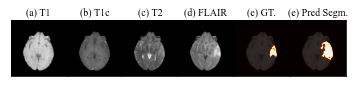

Patient name: BraTS20_Training_332
(array([123, 123, 123, ..., 172, 172, 172], dtype=int64), array([ 94,  94,  94, ..., 105, 105, 105], dtype=int64), array([112, 113, 114, ..., 100, 101, 102], dtype=int64))


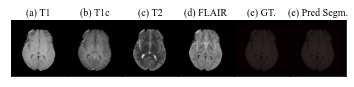

Patient name: BraTS20_Training_333
(array([116, 116, 116, ..., 184, 184, 184], dtype=int64), array([132, 132, 133, ..., 154, 155, 156], dtype=int64), array([75, 76, 73, ..., 68, 68, 68], dtype=int64))


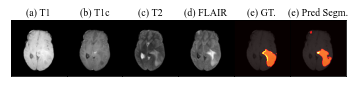

Patient name: BraTS20_Training_334
(array([ 54,  54,  54, ..., 118, 118, 118], dtype=int64), array([146, 146, 147, ..., 138, 138, 138], dtype=int64), array([60, 61, 60, ..., 84, 85, 86], dtype=int64))


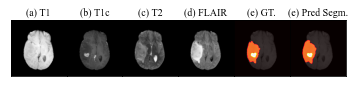

Patient name: BraTS20_Training_335
(array([109, 110, 110, ..., 177, 178, 178], dtype=int64), array([112, 112, 112, ..., 114, 113, 114], dtype=int64), array([58, 56, 57, ..., 54, 54, 54], dtype=int64))


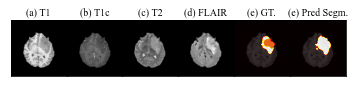

Patient name: BraTS20_Training_336
(array([114, 114, 114, ..., 162, 162, 162], dtype=int64), array([197, 197, 198, ..., 174, 174, 174], dtype=int64), array([79, 80, 77, ..., 78, 79, 80], dtype=int64))


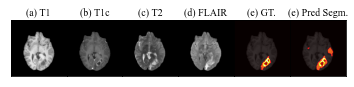

Patient name: BraTS20_Training_337
(array([ 67,  67,  67, ..., 124, 124, 124], dtype=int64), array([147, 147, 147, ..., 146, 147, 147], dtype=int64), array([93, 94, 95, ..., 88, 87, 88], dtype=int64))


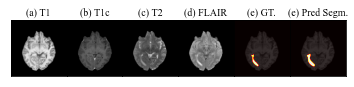

Patient name: BraTS20_Training_338
(array([ 61,  61,  61, ..., 131, 131, 132], dtype=int64), array([126, 126, 126, ..., 108, 108, 107], dtype=int64), array([82, 83, 84, ..., 76, 77, 77], dtype=int64))


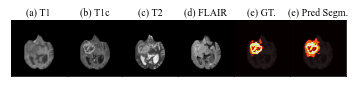

Patient name: BraTS20_Training_339
(array([ 60,  60,  60, ..., 149, 149, 149], dtype=int64), array([140, 140, 140, ..., 155, 156, 156], dtype=int64), array([ 85,  86,  87, ..., 108, 107, 108], dtype=int64))


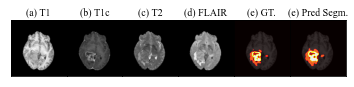

Patient name: BraTS20_Training_340
(array([ 88,  88,  88, ..., 146, 146, 161], dtype=int64), array([129, 129, 129, ..., 144, 144,  82], dtype=int64), array([ 87,  88,  89, ...,  99, 100,  98], dtype=int64))


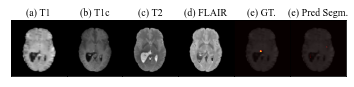

Patient name: BraTS20_Training_341
(array([155, 155, 155, ..., 182, 182, 182], dtype=int64), array([120, 120, 120, ..., 137, 137, 138], dtype=int64), array([57, 58, 59, ..., 57, 58, 57], dtype=int64))


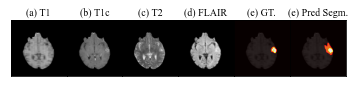

Patient name: BraTS20_Training_342
(array([ 58,  58,  58, ..., 147, 147, 147], dtype=int64), array([106, 106, 106, ..., 155, 155, 155], dtype=int64), array([59, 60, 61, ..., 80, 81, 82], dtype=int64))


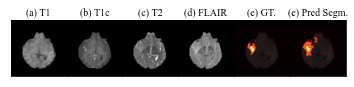

Patient name: BraTS20_Training_343
(array([ 51,  51,  51, ..., 110, 110, 110], dtype=int64), array([128, 128, 129, ..., 149, 149, 150], dtype=int64), array([71, 73, 71, ..., 66, 67, 66], dtype=int64))


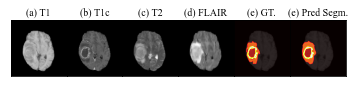

Patient name: BraTS20_Training_344
(array([127, 127, 127, ..., 239, 239, 239], dtype=int64), array([117, 117, 117, ..., 106, 106, 106], dtype=int64), array([69, 70, 71, ..., 56, 57, 58], dtype=int64))


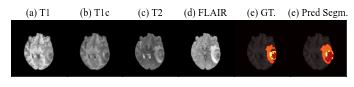

Patient name: BraTS20_Training_345
(array([ 52,  52,  52, ..., 121, 121, 121], dtype=int64), array([141, 141, 142, ..., 149, 149, 150], dtype=int64), array([69, 70, 69, ..., 76, 77, 76], dtype=int64))


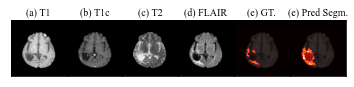

Patient name: BraTS20_Training_346
(array([ 73,  73,  73, ..., 136, 136, 140], dtype=int64), array([153, 153, 153, ..., 203, 203, 193], dtype=int64), array([102, 103, 104, ...,  57,  58,  59], dtype=int64))


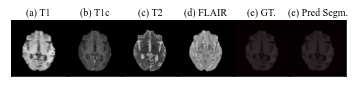

Patient name: BraTS20_Training_347
(array([ 70,  70,  70, ..., 127, 127, 127], dtype=int64), array([106, 106, 107, ..., 101, 102, 102], dtype=int64), array([104, 105, 103, ..., 104, 102, 103], dtype=int64))


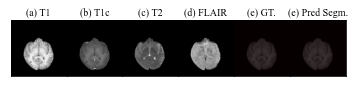

Patient name: BraTS20_Training_348
(array([116, 116, 116, ..., 164, 164, 164], dtype=int64), array([134, 134, 134, ..., 151, 151, 152], dtype=int64), array([79, 80, 81, ..., 86, 87, 85], dtype=int64))


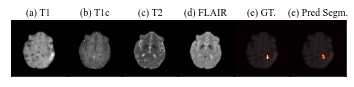

Patient name: BraTS20_Training_349
(array([ 62,  62,  62, ..., 143, 143, 143], dtype=int64), array([114, 114, 115, ...,  90,  90,  90], dtype=int64), array([93, 94, 89, ..., 84, 85, 86], dtype=int64))


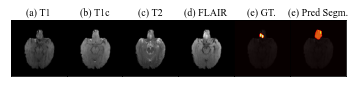

Patient name: BraTS20_Training_350
(array([ 70,  70,  70, ..., 128, 128, 129], dtype=int64), array([157, 157, 158, ..., 154, 155, 153], dtype=int64), array([ 85,  86,  84, ..., 119, 119, 119], dtype=int64))


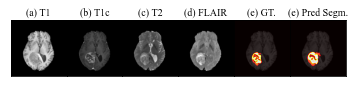

Patient name: BraTS20_Training_351
(array([ 97,  97, 101, ..., 181, 181, 181], dtype=int64), array([186, 187, 195, ..., 136, 137, 137], dtype=int64), array([57, 57, 65, ..., 54, 52, 53], dtype=int64))


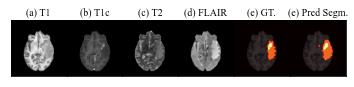

Patient name: BraTS20_Training_352
(array([ 63,  63,  63, ..., 105, 105, 105], dtype=int64), array([165, 165, 166, ..., 196, 196, 197], dtype=int64), array([110, 111, 108, ..., 108, 109, 100], dtype=int64))


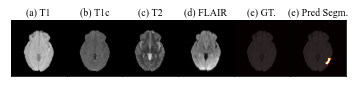

Patient name: BraTS20_Training_353
(array([131, 131, 131, ..., 179, 179, 179], dtype=int64), array([193, 193, 194, ..., 165, 166, 166], dtype=int64), array([51, 52, 51, ..., 62, 59, 60], dtype=int64))


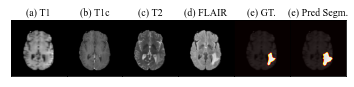

Patient name: BraTS20_Training_354
(array([ 50,  50,  50, ..., 124, 124, 124], dtype=int64), array([134, 134, 134, ..., 137, 137, 137], dtype=int64), array([55, 56, 57, ..., 69, 70, 71], dtype=int64))


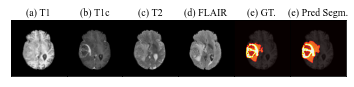

Patient name: BraTS20_Training_355
(array([ 67,  67,  67, ..., 124, 124, 124], dtype=int64), array([116, 116, 116, ..., 117, 117, 118], dtype=int64), array([ 99, 100, 101, ...,  94,  95,  94], dtype=int64))


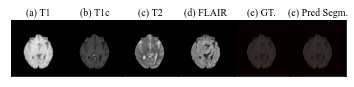

Patient name: BraTS20_Training_356
(array([136, 136, 136, ..., 174, 174, 174], dtype=int64), array([181, 181, 182, ..., 175, 175, 175], dtype=int64), array([81, 82, 79, ..., 66, 67, 68], dtype=int64))


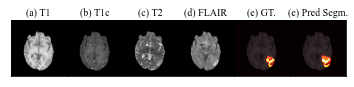

Patient name: BraTS20_Training_357
(array([ 64,  64,  64, ..., 114, 114, 114], dtype=int64), array([119, 119, 120, ..., 127, 128, 128], dtype=int64), array([87, 88, 83, ..., 87, 85, 87], dtype=int64))


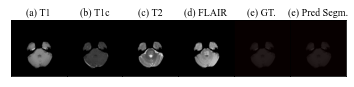

Patient name: BraTS20_Training_358
(array([ 56,  56,  56, ..., 113, 113, 113], dtype=int64), array([140, 140, 140, ..., 111, 112, 113], dtype=int64), array([64, 65, 66, ..., 63, 63, 63], dtype=int64))


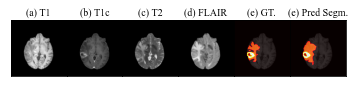

Patient name: BraTS20_Training_359
(array([ 56,  56,  56, ..., 106, 106, 147], dtype=int64), array([142, 142, 143, ..., 157, 157, 173], dtype=int64), array([93, 94, 92, ..., 90, 91, 69], dtype=int64))


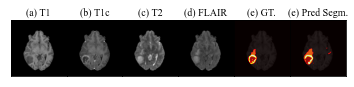

Patient name: BraTS20_Training_360
(array([ 61,  61,  61, ..., 123, 123, 123], dtype=int64), array([109, 109, 109, ..., 103, 104, 104], dtype=int64), array([101, 102, 103, ..., 107,  99, 100], dtype=int64))


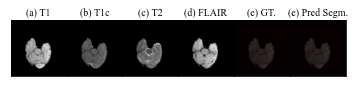

Patient name: BraTS20_Training_361
(array([116, 116, 116, ..., 168, 168, 168], dtype=int64), array([183, 183, 183, ..., 163, 163, 164], dtype=int64), array([ 98,  99, 100, ..., 112, 113, 112], dtype=int64))


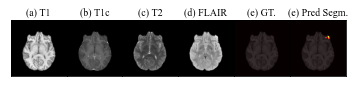

Patient name: BraTS20_Training_362
(array([119, 119, 119, ..., 182, 182, 182], dtype=int64), array([133, 134, 134, ..., 138, 138, 139], dtype=int64), array([68, 67, 68, ..., 57, 58, 57], dtype=int64))


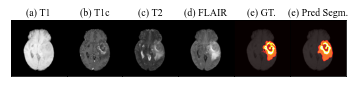

Patient name: BraTS20_Training_363
(array([122, 122, 122, ..., 184, 184, 184], dtype=int64), array([127, 127, 127, ..., 131, 131, 131], dtype=int64), array([95, 96, 97, ..., 66, 67, 68], dtype=int64))


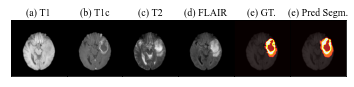

Patient name: BraTS20_Training_364
(array([ 53,  53,  53, ..., 104, 104, 104], dtype=int64), array([132, 132, 133, ..., 156, 157, 157], dtype=int64), array([53, 54, 52, ..., 90, 88, 89], dtype=int64))


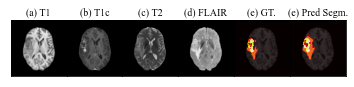

Patient name: BraTS20_Training_365
(array([ 56,  56,  56, ..., 123, 123, 123], dtype=int64), array([140, 140, 140, ..., 133, 133, 133], dtype=int64), array([87, 88, 89, ..., 81, 82, 83], dtype=int64))


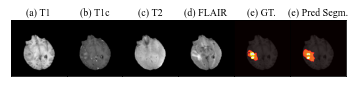

Patient name: BraTS20_Training_366
(array([122, 122, 122, ..., 168, 168, 168], dtype=int64), array([203, 203, 203, ..., 178, 178, 178], dtype=int64), array([92, 93, 94, ..., 86, 87, 88], dtype=int64))


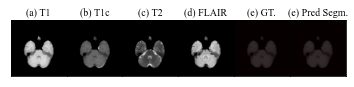

Patient name: BraTS20_Training_367
(array([ 47,  48,  48, ..., 150, 151, 151], dtype=int64), array([153, 146, 147, ..., 181, 181, 181], dtype=int64), array([69, 69, 68, ..., 73, 72, 73], dtype=int64))


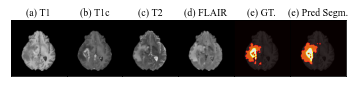

Patient name: BraTS20_Training_368
(array([124, 124, 124, ..., 180, 180, 180], dtype=int64), array([143, 143, 143, ..., 160, 160, 161], dtype=int64), array([85, 86, 87, ..., 77, 78, 75], dtype=int64))


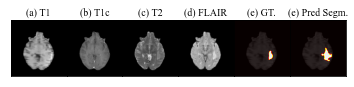

Patient name: BraTS20_Training_369
(array([ 66,  66,  66, ..., 182, 182, 183], dtype=int64), array([108, 109, 109, ..., 173, 173, 171], dtype=int64), array([103, 103, 104, ...,  81,  82,  80], dtype=int64))


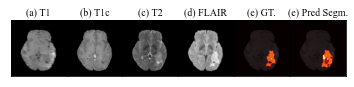

Patient name: name_mapping.csv


FileNotFoundError: No such file or no access: 'C:/Users/JiachennCJC/Documents/GitHub/brats-pretraining_jiachenn/MICCAI_BraTS2020_TrainingData/name_mapping.csv/name_mapping.csv_t1.nii.gz'

In [24]:
model_folder = "20210321-070858_brats20_3d_small_training_2_lr_0.0001_epochs_70_epochbatch_75_epoch_10"
seg_output_path = f'{path_to_this_repo_folder}segmentation_output/{model_folder}/Brats20TrainingData/'
training_data_path = f'{path_to_this_repo_folder}MICCAI_BraTS2020_TrainingData/'
patient_list = [i for i in os.listdir(training_data_path) if i != "survival_evaluation.csv" or i != "name_mapping.csv"]
patient_list = patient_list[300:]

for patient_name in patient_list:
    print(f"Patient name: {patient_name}")
    patient_t1 = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_t1.nii.gz').get_fdata()
    patient_t1c = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_t1ce.nii.gz').get_fdata()
    patient_t2 = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_t2.nii.gz').get_fdata()
    patient_flair = nib.load(training_data_path + f'{patient_name}/' +  f'{patient_name}_flair.nii.gz').get_fdata()
    patient_seg = nib.load(training_data_path+ f'{patient_name}/' + f"{patient_name}_seg.nii.gz").get_fdata()
    predicted_seg = nib.load(seg_output_path+ f"{patient_name}.nii.gz").get_fdata()

    fig, axs = plt.subplots(1, 6, frameon=False)
    slice_nr = 65
    print(patient_seg.nonzero())
    # Remove horizontal space between axes
    fig.subplots_adjust(wspace=0)

    subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

    subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

    subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

    subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

    subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[4], patient_seg[:,:,slice_nr], '(e) GT.', alpha=0.8)
    
    subimage(axs[5], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
    subimage(axs[5], predicted_seg[:,:,slice_nr], '(e) Pred Segm.', alpha=0.8)

#     plt.savefig(f'figures/LMAO{patient_name}.jpg', dpi=400, bbox_inches='tight', pad_inches=0)

    plt.show()
